# Go Instore <br> Data Take Home Test 

## Introduction

### Problem 
<hr>A new product has been launched by Go Instore, referred to as ‘One to One Appointments Booking’, this is
    <blockquote><i> A pre-booking system designed to schedule Go Instore calls in advance. Customers can book, cancel or modify their booking prior to the scheduled launch of the 2 way video call.
    </i></blockquote>
We have been asked to explore the Appointment data and report on this feature. This anlysis will focus on:

1)  Overall performance of this new Appointment feature<br>
2)  Where have we been successful<br>
3)  What improvements can be made to this service

### Module Imports

In [346]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import datetime
import scipy
import seaborn as sns
from imblearn.over_sampling import SMOTE
import sklearn
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier


## Dataset

### Import CSV

In [347]:
appointments_df = pd.read_csv('Go Instore Test - Appointments Assignment 3.csv',parse_dates=[3,4,5,6,7,8,12,13,15,17,18,29])

In [348]:
len(appointments_df)

903

In [349]:
len(appointments_df['call_id'].unique())

850

In [350]:
appointments_clean_df = appointments_df.drop_duplicates()

In [351]:
len(appointments_clean_df)

894

In [352]:
duplicates_df= appointments_df.iloc[list(set(appointments_df.index) - set(appointments_clean_df.index))]

The Appointments CSV file has been read and saved as a Pandas dataframe.The call_id is a unique identifier for each booking; this will be used as the index. Duplicate rows (across all columns) have been dropped (saved to another dataframe, taking the rows from 903 to 894.

In [353]:
pd.set_option('display.max_columns', None)
appointments_clean_df.head(10)

,call_id,Customer Id,Call Type,Date Created Local,Created At Local,Call Started Local,Scheduled Start Date Local,Scheduled Start Time Local,Scheduled End Time Local,Status,Booking Title,Booked By Staff Id,Staff First Joined Activity Timestamps Local,Staff Joined Activities Timestamps Local,Staff Joined Count,Staff Left Activities Timestamps UTC,Customer Joined Count,Customer Joined Activities Timestamps UTC,Customer Left Activities Timestamps UTC,Customer Enabled Video,Call Result,Call Duration (Sec),Staff Score,Avg Customer Rating (Overall),"Rating Question ""How Was The Stream Quality""","Rating Question ""Did you find your rep helpful?""","Rating Question ""How likely are you to use this service again""?",purchase_made_after_call,purchase_value_usd,timestamp of checkout,days_between_call_and_purchase
0,10653788,fk3nlsty-g7lu-ig6q-xli8-q1rjko1eh09c,BOOKING,2021-05-26,2021-05-26 15:52:00,2021-05-28 10:19:00,2021-05-28,2021-05-28 10:15:00,2021-05-28 10:25:00,ENDED,Live expert booking - All Goods,21998,2021-05-28 10:12:00,"2021-05-28 10:12:17, 2021-05-28 10:15:11, 2021...",3,"2021-05-28 10:15:07, 2021-05-28 10:17:04, 2021...",1,28/05/2021 10:19,NaN,0,Booking - Successful call,147,3.0,NaN,NaN,NaN,NaN,YES,23.6,2021-01-06 13:21:00,4.0
1,10343190,kk4w9y59-suss-ampm-4pox-oj2qhv0py3t4,BOOKING,2021-08-05,2021-08-05 23:04:00,2021-12-05 16:45:00,2021-12-05,2021-12-05 16:45:00,2021-12-05 16:55:00,ENDED,Live expert booking - All Goods,22017,2021-12-05 16:41:00,12/05/2021 16:41,1,12/05/2021 16:51,1,12/05/2021 16:45,NaN,1,Booking - Successful call,356,3.0,5.00,5.0,5.0,5.0,YES,597.0,2021-05-16 20:34:00,4.0
2,9647059,6vzngogp-dd3d-yllc-3zsc-gb3wui8cnsfo,BOOKING,2021-06-04,2021-06-04 16:53:00,2021-07-04 17:14:00,2021-07-04,2021-07-04 17:00:00,2021-07-04 17:10:00,ENDED,Live expert booking - All Goods,22017,2021-07-04 16:58:00,07/04/2021 16:58,1,07/04/2021 17:32,2,"2021-04-07 17:01:10, 2021-04-07 17:13:54",NaN,1,Booking - Successful call,2427,4.0,5.00,5.0,5.0,5.0,YES,27.5,2021-02-05 14:10:00,25.0
3,9647059,6vzngogp-dd3d-yllc-3zsc-gb3wui8cnsfo,BOOKING,2021-06-04,2021-06-04 16:53:00,2021-07-04 17:14:00,2021-07-04,2021-07-04 17:00:00,2021-07-04 17:10:00,ENDED,Live expert booking - All Goods,22017,2021-07-04 16:58:00,07/04/2021 16:58,1,07/04/2021 17:32,2,"2021-04-07 17:01:10, 2021-04-07 17:13:54",NaN,1,Booking - Successful call,2427,4.0,5.00,5.0,5.0,5.0,YES,39.0,2021-04-24 10:57:00,17.0
4,9709891,6l13g0kj-g0pa-hbw7-xshv-5ekgl2111yo6,BOOKING,2021-08-04,2021-08-04 18:10:00,2021-09-04 18:07:00,2021-09-04,2021-09-04 18:00:00,2021-09-04 18:15:00,ENDED,Live expert booking - All Goods,21998,2021-09-04 18:07:00,09/04/2021 18:07,1,09/04/2021 18:15,1,09/04/2021 17:59,NaN,1,Booking - Successful call,524,3.0,4.00,4.0,4.0,4.0,YES,179.0,2021-04-23 08:23:00,14.0
5,9855287,yaogtp01-dez1-umb4-ijra-wbt5heqq1aa5,BOOKING,2021-04-15,2021-04-15 02:23:00,2021-04-16 14:16:00,2021-04-16,2021-04-16 14:15:00,2021-04-16 14:25:00,ENDED,Live expert booking - All Goods,21556,2021-04-16 14:15:00,16/04/2021 14:15,1,16/04/2021 14:23,1,16/04/2021 14:16,16/04/2021 14:23,1,Booking - Successful call,437,3.0,4.67,5.0,5.0,4.0,YES,767.1,2021-04-19 22:03:00,3.0
6,9779095,higgtrpr-o7df-xdl6-39ah-9gi47oas18yo,BOOKING,2021-11-04,2021-11-04 21:23:00,2021-04-13 17:35:00,2021-04-13,2021-04-13 17:30:00,2021-04-13 17:40:00,ENDED,Live expert booking - All Goods,21998,2021-04-13 17:26:00,13/04/2021 17:26,1,13/04/2021 17:40,1,13/04/2021 17:35,NaN,1,Booking - Successful call,263,3.0,NaN,NaN,NaN,NaN,YES,1918.4,2021-04-17 12:33:00,4.0
7,9763767,4q374ps1-xgoh-cg4f-bkb5-l0uhpzbc45hk,BOOKING,2021-11-04,2021-11-04 09:03:00,2021-12-04 10:15:00,2021-12-04,2021-12-04 10:15:00,2021-12-04 10:25:00,ENDED,Live expert booking - All Goods,21998,2021-12-04 10:11:00,"2021-04-12 10:11:38, 2021-04-12 10:26:02",2,"2021-04-12 10:25:48, 2021-04-12 10:42:31",3,"2021-04-12 10:14:56, 2021-04-12 10:15:51, 2021...",12/04/2021 10:26,1,Booking - Successful call,648,3.0,NaN,NaN,NaN,NaN,YES,30.0,2021-04-15 21:26:00,4.0
8,9101652,yyj

In [354]:
duplicates_df.sort_values('call_id')

,call_id,Customer Id,Call Type,Date Created Local,Created At Local,Call Started Local,Scheduled Start Date Local,Scheduled Start Time Local,Scheduled End Time Local,Status,Booking Title,Booked By Staff Id,Staff First Joined Activity Timestamps Local,Staff Joined Activities Timestamps Local,Staff Joined Count,Staff Left Activities Timestamps UTC,Customer Joined Count,Customer Joined Activities Timestamps UTC,Customer Left Activities Timestamps UTC,Customer Enabled Video,Call Result,Call Duration (Sec),Staff Score,Avg Customer Rating (Overall),"Rating Question ""How Was The Stream Quality""","Rating Question ""Did you find your rep helpful?""","Rating Question ""How likely are you to use this service again""?",purchase_made_after_call,purchase_value_usd,timestamp of checkout,days_between_call_and_purchase
359,8147395,sinmbd7v-efk2-953m-ap0a-v4ir8w7epwov,BOOKING,2021-02-16,2021-02-16 12:25:00,2021-02-16 12:37:00,2021-02-16,2021-02-16 12:30:00,2021-02-16 12:40:00,ENDED,Live expert booking - All Goods,22017,2021-02-16 12:27:00,16/02/2021 12:27,1,16/02/2021 12:39,2,"2021-02-16 12:27:32, 2021-02-16 12:37:36","2021-02-16 12:33:18, 2021-02-16 12:39:05",1,Booking - Successful call,85,3.0,5.00,5.0,5.0,5.0,NO,NaN,NaT,NaN
76,8330240,euoaq1i0-mpvm-l83z-qdm9-7ke5szg9x07c,BOOKING,2021-02-21,2021-02-21 13:10:00,2021-02-23 11:31:00,2021-02-23,2021-02-23 11:30:00,2021-02-23 11:40:00,ENDED,Live expert booking - All Goods,21557,2021-02-23 11:31:00,23/02/2021 11:31,1,23/02/2021 11:51,1,23/02/2021 11:29,23/02/2021 11:51,1,Booking - Successful call,1171,4.0,4.67,5.0,4.0,5.0,YES,45.0,2021-03-16 18:54:00,21.0
633,8795619,sf4o3cug-zamh-9nx3-wvt6-l93xioxbmsva,BOOKING,2021-06-03,2021-06-03 23:40:00,NaT,2021-09-03,2021-09-03 11:15:00,2021-09-03 11:25:00,ENDED,Live expert booking - All Goods,22017,2021-09-03 11:13:00,"2021-03-09 11:13:16, 2021-03-09 11:20:04, 2021...",3,"2021-03-09 11:21:39, 2021-03-09 11:23:59",3,"2021-03-09 11:14:29, 2021-03-09 11:20:45, 2021...",NaN,1,Booking - Consumer and clerk join but not pres...,0,1.0,1.00,1.0,1.0,1.0,NO,NaN,NaT,NaN
634,8795619,sf4o3cug-zamh-9nx3-wvt6-l93xioxbmsva,BOOKING,2021-06-03,2021-06-03 23:40:00,NaT,2021-09-03,2021-09-03 11:15:00,2021-09-03 11:25:00,ENDED,Live expert booking - All Goods,22017,2021-09-03 11:13:00,"2021-03-09 11:13:16, 2021-03-09 11:20:04, 2021...",3,"2021-03-09 11:21:39, 2021-03-09 11:23:59",3,"2021-03-09 11:14:29, 2021-03-09 11:20:45, 2021...",NaN,1,Booking - Consumer and clerk join but not pres...,0,1.0,1.00,1.0,1.0,1.0,NO,NaN,NaT,NaN
671,9812318,n13ra3q8-0tah-owbj-9zzr-ari7c41aotoe,BOOKING,2021-04-13,2021-04-13 10:55:00,2021-04-14 11:16:00,2021-04-14,2021-04-14 11:00:00,2021-04-14 11:15:00,CREATED,Live expert booking - All Goods,21557,NaT,NaN,0,NaN,7,"2021-04-14 11:02:27, 2021-04-14 11:06:53, 2021...","2021-04-14 11:17:07, 2021-04-14 11:59:05, 2021...",1,Booking - Consumer joined clerk did not joined,8013,NaN,1.00,1.0,1.0,1.0,NO,NaN,NaT,NaN
673,9875991,7t4ntbw7-qyft-aa8v-fn6a-h6s88ty9mktg,BOOKING,2021-04-15,2021-04-15 20:11:00,2021-04-17 11:12:00,2021-04-17,2021-04-17 11:00:00,2021-04-17 11:10:00,CREATED,Live expert booking - All Goods,22854,NaT,NaN,0,NaN,18,"2021-04-17 11:00:51, 2021-04-17 11:02:20, 2021...",NaN,1,Booking - Consumer joined clerk did not joined,29808,NaN,1.00,1.0,1.0,1.0,NO,NaN,NaT,NaN
678,9932124,2ucg9pvy-38qf-uk0u-qfkz-st9n6fl6584o,BOOKING,2021-04-18,2021-04-18 22:59:00,2021-04-20 12:10:00,2021-04-20,2021-04-20 12:00:00,2021-04-20 12:10:00,CREATED,Live expert booking - All Goods,21555,NaT,NaN,0,NaN,5,"2021-04-20 12:07:20, 2021-04-20 12:08:42, 2021...","2021-04-20 12:22:06, 2021-04-20 12:31:41",1,Booking - Consumer joined clerk did not joined,1265,NaN,1.00,1.0,1.0,1.0,NO,NaN,NaT,NaN
688,10926513,qp386l7r-kjbu-yz73-6nor-fuzumxpuk17t,BOOKING,2021-06-14,2021-06-14 11:29:00,NaT,2021-06-15,2021-06-15 11:30:00,2021-06-15 11:40:00,CREATED,Live expert booking - All Goods,22851,NaT,NaN,0,NaN,3,"2021-06-15 11:31:04, 2021-06-15 11:40:37, 2021...","2021-06-15 11:40:10, 2021-06-15 11:4

In [355]:
duplicates_df = duplicates_df.set_index('call_id')

In [356]:
appointments_clean_df = appointments_clean_df.set_index('call_id')

In [357]:
len(duplicates_df)

9

In [358]:
appointments_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 894 entries, 10653788 to 7925690
Data columns (total 30 columns):
 #   Column                                                           Non-Null Count  Dtype         
---  ------                                                           --------------  -----         
 0   Customer Id                                                      510 non-null    object        
 1   Call Type                                                        894 non-null    object        
 2   Date Created Local                                               894 non-null    datetime64[ns]
 3   Created At Local                                                 894 non-null    datetime64[ns]
 4   Call Started Local                                               443 non-null    datetime64[ns]
 5   Scheduled Start Date Local                                       894 non-null    datetime64[ns]
 6   Scheduled Start Time Local                                       894 no

The information frame above shows the columns that have null values.

In [359]:
appointments_clean_df.columns

Index(['Customer Id', 'Call Type', 'Date Created Local', 'Created At Local',
       'Call Started Local', 'Scheduled Start Date Local',
       'Scheduled Start Time Local', 'Scheduled End Time Local', 'Status',
       'Booking Title', 'Booked By Staff Id',
       'Staff First Joined Activity Timestamps Local',
       'Staff Joined Activities Timestamps Local', 'Staff Joined Count',
       'Staff Left Activities Timestamps UTC', 'Customer Joined Count',
       'Customer Joined Activities Timestamps UTC',
       'Customer Left Activities Timestamps UTC', 'Customer Enabled Video',
       'Call Result', 'Call Duration (Sec)', 'Staff Score',
       'Avg Customer Rating (Overall)',
       'Rating Question "How Was The Stream Quality"',
       'Rating Question "Did you find your rep helpful?"',
       'Rating Question "How likely are you to use this service again"?',
       'purchase_made_after_call', 'purchase_value_usd',
       'timestamp of checkout', 'days_between_call_and_purchase'],
   

In [360]:
appointments_clean_df.columns = [c.replace(' ', '_') for c in appointments_clean_df.columns]

In [361]:
appointments_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 894 entries, 10653788 to 7925690
Data columns (total 30 columns):
 #   Column                                                           Non-Null Count  Dtype         
---  ------                                                           --------------  -----         
 0   Customer_Id                                                      510 non-null    object        
 1   Call_Type                                                        894 non-null    object        
 2   Date_Created_Local                                               894 non-null    datetime64[ns]
 3   Created_At_Local                                                 894 non-null    datetime64[ns]
 4   Call_Started_Local                                               443 non-null    datetime64[ns]
 5   Scheduled_Start_Date_Local                                       894 non-null    datetime64[ns]
 6   Scheduled_Start_Time_Local                                       894 no

In [362]:
appointments_clean_df.isna().sum() + appointments_clean_df.notna().sum()

Customer_Id                                                        894
Call_Type                                                          894
Date_Created_Local                                                 894
Created_At_Local                                                   894
Call_Started_Local                                                 894
Scheduled_Start_Date_Local                                         894
Scheduled_Start_Time_Local                                         894
Scheduled_End_Time_Local                                           894
Status                                                             894
Booking_Title                                                      894
Booked_By_Staff_Id                                                 894
Staff_First_Joined_Activity_Timestamps_Local                       894
Staff_Joined_Activities_Timestamps_Local                           894
Staff_Joined_Count                                                 894
Staff_

All columns have 894 entries (after removing duplicate rows), a combination of null and non-null values.

Spaces have been removed from column names.
Have checked that all columns have 894 entries (null + non-null).

### Exploratory Data Analysis

Below, explored data relating to Staff and Customer join counts. Saved aggregate timestamps to other dataframes.

In [363]:
appointments_clean_df['Staff_Joined_Count'].max()

6

In [364]:
appointments_clean_df['Customer_Joined_Count'].max()

18

In [365]:
Staff_Joined_Activities_Timestamps_Local_df = pd.DataFrame(appointments_clean_df.Staff_Joined_Activities_Timestamps_Local.tolist(), index=appointments_clean_df.index)
Staff_Joined_Activities_Timestamps_Local_df= Staff_Joined_Activities_Timestamps_Local_df[0].str.split(pat=',',n=-1, expand=True)
Staff_Joined_Activities_Timestamps_Local_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 894 entries, 10653788 to 7925690
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       643 non-null    object
 1   1       147 non-null    object
 2   2       42 non-null     object
 3   3       11 non-null     object
 4   4       7 non-null      object
 5   5       5 non-null      object
dtypes: object(6)
memory usage: 48.9+ KB


In [366]:
Staff_Joined_Activities_Timestamps_Local_df

,0,1,2,3,4,5
call_id,,,,,,
10653788,2021-05-28 10:12:17,2021-05-28 10:15:11,2021-05-28 10:17:14,None,None,None
10343190,12/05/2021 16:41,None,None,None,None,None
9647059,07/04/2021 16:58,None,None,None,None,None
9647059,07/04/2021 16:58,None,None,None,None,None
9709891,09/04/2021 18:07,None,None,None,None,None
...,...,...,...,...,...,...
11111696,NaN,NaN,NaN,NaN,NaN,NaN
11144660,NaN,NaN,NaN,NaN,NaN,NaN
11144933,NaN,NaN,NaN,NaN,NaN,NaN


In [367]:
Staff_Joined_Activities_Timestamps_Local_df = Staff_Joined_Activities_Timestamps_Local_df.replace(to_replace=[None], value=np.nan, inplace=True)
Staff_Joined_Activities_Timestamps_Local_df

In [368]:
Staff_Left_Activities_Timestamps_UTC_df = pd.DataFrame(appointments_clean_df.Staff_Left_Activities_Timestamps_UTC.tolist(), index= appointments_clean_df.index)
Staff_Left_Activities_Timestamps_UTC_df = Staff_Left_Activities_Timestamps_UTC_df[0].str.split(pat=',',n=-1, expand=True)
Staff_Left_Activities_Timestamps_UTC_df = Staff_Left_Activities_Timestamps_UTC_df.replace(to_replace=[None], value=np.nan, inplace=True)

In [369]:
Staff_Joined_Activities_Timestamps_Local_df

In [370]:
Customer_Joined_Activities_Timestamps_UTC_df = pd.DataFrame(appointments_clean_df.Customer_Joined_Activities_Timestamps_UTC.tolist(), index=appointments_clean_df.index)

In [371]:
Customer_Joined_Activities_Timestamps_UTC_df

,0
call_id,
10653788,28/05/2021 10:19
10343190,12/05/2021 16:45
9647059,"2021-04-07 17:01:10, 2021-04-07 17:13:54"
9647059,"2021-04-07 17:01:10, 2021-04-07 17:13:54"
9709891,09/04/2021 17:59
...,...
11111696,NaN
11144660,NaN
11144933,NaN


In [372]:
Customer_Joined_Activities_Timestamps_UTC_df= Customer_Joined_Activities_Timestamps_UTC_df[0].str.split(pat=',',n=-1, expand=True)

In [373]:
Customer_Joined_Activities_Timestamps_UTC_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
call_id,,,,,,,,,,,,,,,,,,
10653788,28/05/2021 10:19,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
10343190,12/05/2021 16:45,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
9647059,2021-04-07 17:01:10,2021-04-07 17:13:54,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
9647059,2021-04-07 17:01:10,2021-04-07 17:13:54,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
9709891,09/04/2021 17:59,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11111696,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11144660,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11144933,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [374]:
 Customer_Joined_Activities_Timestamps_UTC_df = Customer_Joined_Activities_Timestamps_UTC_df.replace(to_replace='None', inplace=True, value=np.nan)

In [375]:
Customer_Joined_Activities_Timestamps_UTC_df

In [376]:
Customer_Left_Activities_Timestamps_UTC_df = pd.DataFrame(appointments_clean_df.Customer_Left_Activities_Timestamps_UTC.tolist(), index=appointments_clean_df.index)

In [377]:
Customer_Left_Activities_Timestamps_UTC_df= Customer_Left_Activities_Timestamps_UTC_df[0].str.split(pat=',',n=-1, expand=True)

In [378]:
Customer_Left_Activities_Timestamps_UTC_df = Customer_Left_Activities_Timestamps_UTC_df.replace(to_replace=[None], value=np.nan, inplace=True)

In [379]:
Customer_Left_Activities_Timestamps_UTC_df

#### Purchase Made After Call

The figure below shows purchase and no purchase after call numbers. This would be a good dependent variable for a prediction model but first the imbalance may need to be addressed. 

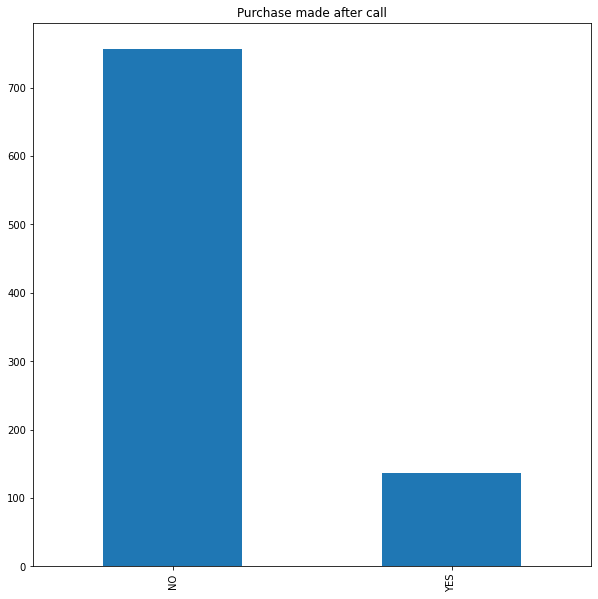

In [380]:
appointments_clean_df['purchase_made_after_call'].value_counts().plot(kind='bar', figsize=[10,10],title='Purchase made after call')

In [381]:
appointments_clean_df['purchase_made_after_call'].value_counts()

NO     757
YES    137
Name: purchase_made_after_call, dtype: int64

In [382]:
Proportion = round((appointments_clean_df[appointments_clean_df['purchase_made_after_call'] == 'YES'].shape[0]) / (appointments_clean_df['purchase_made_after_call'].shape[0]),2)

In [383]:
Proportion

0.15

'Good' ecommerce conversion rates are often around 1-2%. So 15% at first glance appears to be very good. Questions: What are the target conversion rates? In addition to ecommerce what other sectors would make appropriate comparisons?

Investigate further the following: 1) why did 15% purchase and how can we retain those customers? Retention is easier than acquiring new customers 2) insights into how we can target the 85% that did not buy.

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


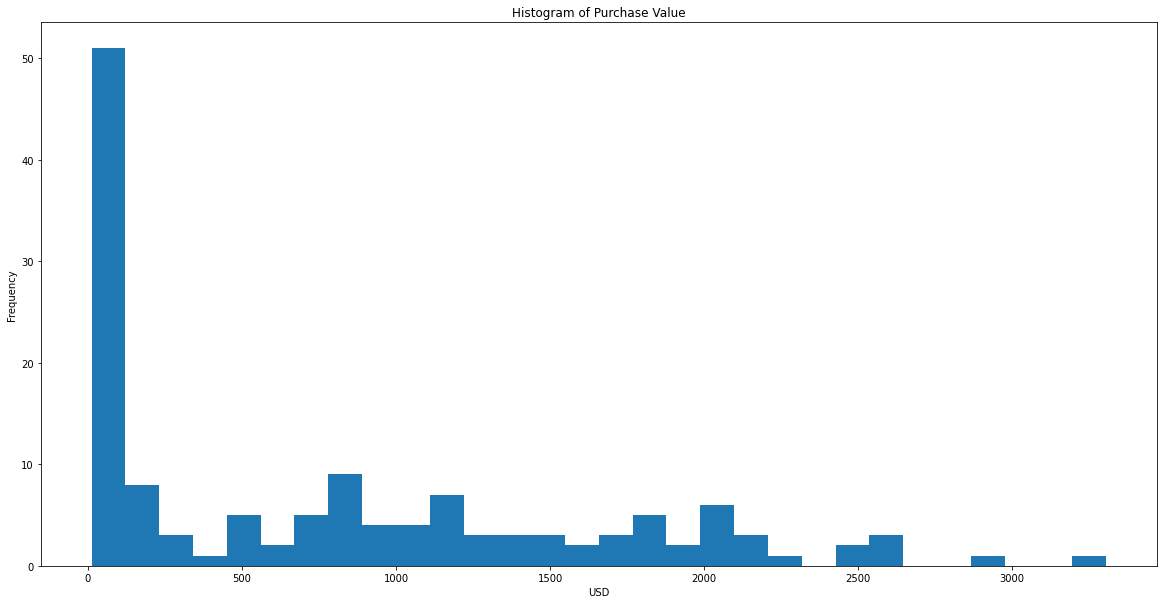

In [384]:
fig,ax = plt.subplots(figsize=[20,10])
ax.hist(appointments_clean_df['purchase_value_usd'], 30)
ax.set_title('Histogram of Purchase Value')
ax.set_xlabel('USD')
ax.set_ylabel('Frequency')
plt.show()

Histogram of purchase value is highly skewed to the right, not a normal distribution.

In [385]:
appointments_clean_df['Status_num'] = appointments_clean_df['Status']
appointments_clean_df['Status_num'] = appointments_clean_df['Status_num'].replace(['CANCELLED','CREATED','ENDED'], [0, 1, 2])

In [386]:
appointments_clean_df

,Customer_Id,Call_Type,Date_Created_Local,Created_At_Local,Call_Started_Local,Scheduled_Start_Date_Local,Scheduled_Start_Time_Local,Scheduled_End_Time_Local,Status,Booking_Title,Booked_By_Staff_Id,Staff_First_Joined_Activity_Timestamps_Local,Staff_Joined_Activities_Timestamps_Local,Staff_Joined_Count,Staff_Left_Activities_Timestamps_UTC,Customer_Joined_Count,Customer_Joined_Activities_Timestamps_UTC,Customer_Left_Activities_Timestamps_UTC,Customer_Enabled_Video,Call_Result,Call_Duration_(Sec),Staff_Score,Avg_Customer_Rating_(Overall),"Rating_Question_""How_Was_The_Stream_Quality""","Rating_Question_""Did_you_find_your_rep_helpful?""","Rating_Question_""How_likely_are_you_to_use_this_service_again""?",purchase_made_after_call,purchase_value_usd,timestamp_of_checkout,days_between_call_and_purchase,Status_num
call_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
10653788,fk3nlsty-g7lu-ig6q-xli8-q1rjko1eh09c,BOOKING,2021-05-26,2021-05-26 15:52:00,2021-05-28 10:19:00,2021-05-28,2021-05-28 10:15:00,2021-05-28 10:25:00,ENDED,Live expert booking - All Goods,21998,2021-05-28 10:12:00,"2021-05-28 10:12:17, 2021-05-28 10:15:11, 2021...",3,"2021-05-28 10:15:07, 2021-05-28 10:17:04, 2021...",1,28/05/2021 10:19,NaN,0,Booking - Successful call,147,3.0,NaN,NaN,NaN,NaN,YES,23.6,2021-01-06 13:21:00,4.0,2
10343190,kk4w9y59-suss-ampm-4pox-oj2qhv0py3t4,BOOKING,2021-08-05,2021-08-05 23:04:00,2021-12-05 16:45:00,2021-12-05,2021-12-05 16:45:00,2021-12-05 16:55:00,ENDED,Live expert booking - All Goods,22017,2021-12-05 16:41:00,12/05/2021 16:41,1,12/05/2021 16:51,1,12/05/2021 16:45,NaN,1,Booking - Successful call,356,3.0,5.0,5.0,5.0,5.0,YES,597.0,2021-05-16 20:34:00,4.0,2
9647059,6vzngogp-dd3d-yllc-3zsc-gb3wui8cnsfo,BOOKING,2021-06-04,2021-06-04 16:53:00,2021-07-04 17:14:00,2021-07-04,2021-07-04 17:00:00,2021-07-04 17:10:00,ENDED,Live expert booking - All Goods,22017,2021-07-04 16:58:00,07/04/2021 16:58,1,07/04/2021 17:32,2,"2021-04-07 17:01:10, 2021-04-07 17:13:54",NaN,1,Booking - Successful call,2427,4.0,5.0,5.0,5.0,5.0,YES,27.5,2021-02-05 14:10:00,25.0,2
9647059,6vzngogp-dd3d-yllc-3zsc-gb3wui8cnsfo,BOOKING,2021-06-04,2021-06-04 16:53:00,2021-07-04 17:14:00,2021-07-04,2021-07-04 17:00:00,2021-07-04 17:10:00,ENDED,Live expert booking - All Goods,22017,2021-07-04 16:58:00,07/04/2021 16:58,1,07/04/2021 17:32,2,"2021-04-07 17:01:10, 2021-04-07 17:13:54",NaN,1,Booking - Successful call,2427,4.0,5.0,5.0,5.0,5.0,YES,39.0,2021-04-24 10:57:00,17.0,2
9709891,6l13g0kj-g0pa-hbw7-xshv-5ekgl2111yo6,BOOKING,2021-08-04,2021-08-04 18:10:00,2021-09-04 18:07:00,2021-09-04,2021-09-04 18:00:00,2021-09-04 18:15:00,ENDED,Live expert booking - All Goods,21998,2021-09-04 18:07:00,09/04/2021 18:07,1,09/04/2021 18:15,1,09/04/2021 17:59,NaN,1,Booking - Successful call,524,3.0,4.0,4.0,4.0,4.0,YES,179.0,2021-04-23 08:23:00,14.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11111696,NaN,BOOKING,2021-06-25,2021-06-25 17:06:00,NaT,2021-06-26,2021-06-26 17:30:00,2021-06-26 17:40:00,CANCELLED,Live expert booking - All Goods,21998,NaT,NaN,0,NaN,0,NaN,NaN,0,Booking - No one joined,0,NaN,NaN,NaN,NaN,NaN,NO,NaN,NaT,NaN,0
11144660,NaN,BOOKING,2021-06-28,2021-06-28 11:19:00,NaT,2021-06-29,2021-06-29 16:30:00,2021-06-29 16:40:00,CANCELLED,Live expert booking - All Goods,22613,NaT,NaN,0,NaN,0,NaN,NaN,0,Booking - No one joined,0,NaN,NaN,NaN,NaN,NaN,NO,NaN,NaT,NaN,0
11144933,NaN,BOOKING,2021-06-28,2021-06-28 11:30:00,NaT,2021-06-29,2021-06-29 11:30:00,2021-06-29 11:40:00,CANCELLED,Live expert booking - All Goods,21557,NaT,NaN,0,NaN,0,NaN,NaN,0,Booking - No one joined,0,NaN,NaN,NaN,NaN,NaN,NO,NaN,NaT,NaN,0


#### Correlation

Correlation matrix below shows features that are correlated, such as the four rating questions whose respective quadrants are beige, indicating a high positive correlation with each other. Will remove correlated features before running a prediction model.

[Text(0.5, 0, 'Booked_By_Staff_Id'),
 Text(1.5, 0, 'Staff_Joined_Count'),
 Text(2.5, 0, 'Customer_Joined_Count'),
 Text(3.5, 0, 'Customer_Enabled_Video'),
 Text(4.5, 0, 'Call_Duration_(Sec)'),
 Text(5.5, 0, 'Staff_Score'),
 Text(6.5, 0, 'Avg_Customer_Rating_(Overall)'),
 Text(7.5, 0, 'Rating_Question_"How_Was_The_Stream_Quality"'),
 Text(8.5, 0, 'Rating_Question_"Did_you_find_your_rep_helpful?"'),
 Text(9.5, 0, 'Rating_Question_"How_likely_are_you_to_use_this_service_again"?'),
 Text(10.5, 0, 'purchase_value_usd'),
 Text(11.5, 0, 'days_between_call_and_purchase'),
 Text(12.5, 0, 'Status_num')]

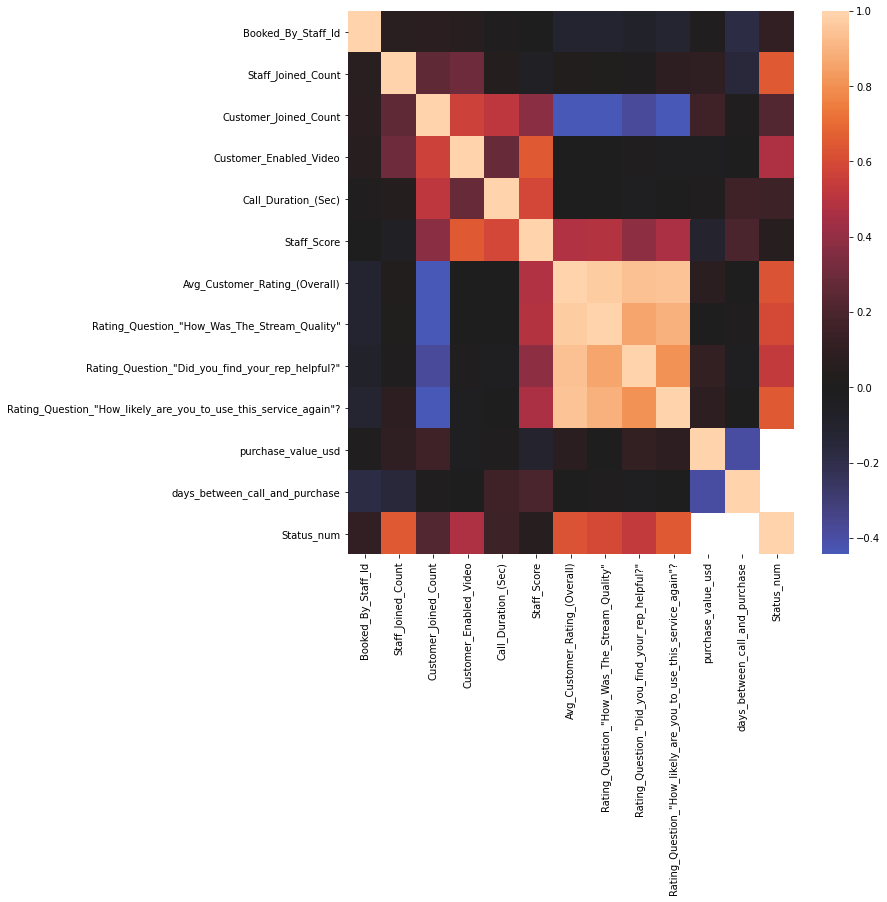

In [387]:
corr = appointments_clean_df.corr()
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr, center=0,)
ax.set_xticklabels(ax.get_xticklabels())

#### Rating Questions Density Estimates

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fcbe5706340>],
      dtype=object)

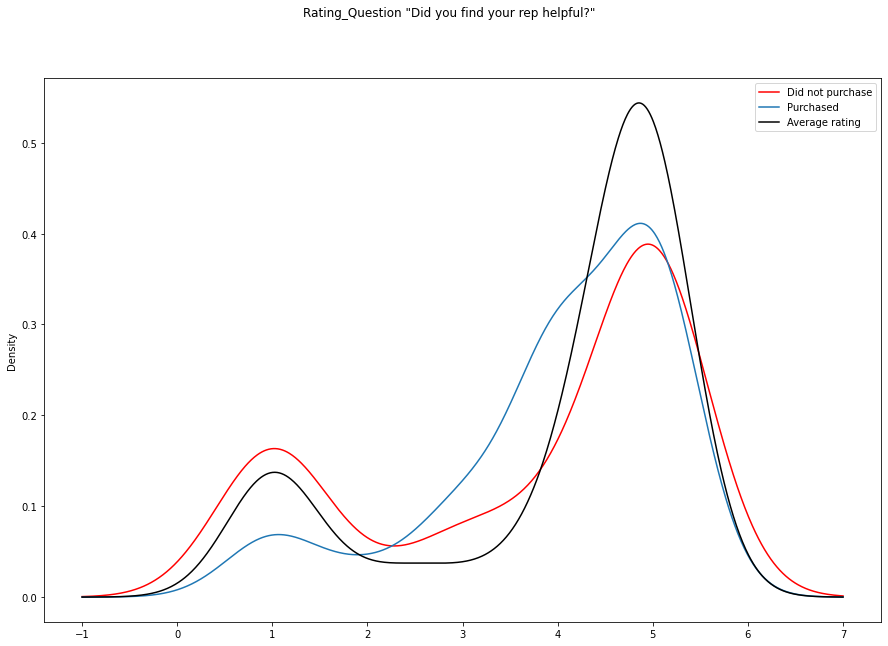

In [388]:
kde_yes_df = appointments_clean_df[appointments_clean_df['purchase_made_after_call'] == 'YES']
kde_no_df = appointments_clean_df[appointments_clean_df['purchase_made_after_call'] == 'NO']

kde_no_df['Rating_Question_"Did_you_find_your_rep_helpful?"'].plot.kde(subplots=True, title='Rating_Question "Did you find your rep helpful?"', label='Did not purchase',legend=True,color='red',figsize=(15,10))
kde_yes_df['Rating_Question_"Did_you_find_your_rep_helpful?"'].plot.kde(subplots=True,label='Purchased',legend=True,figsize=(15,10))
appointments_clean_df['Avg_Customer_Rating_(Overall)'].plot.kde(subplots=True,label='Average rating',color='black',legend=True,figsize=(15,10))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fcbe57a94c0>],
      dtype=object)

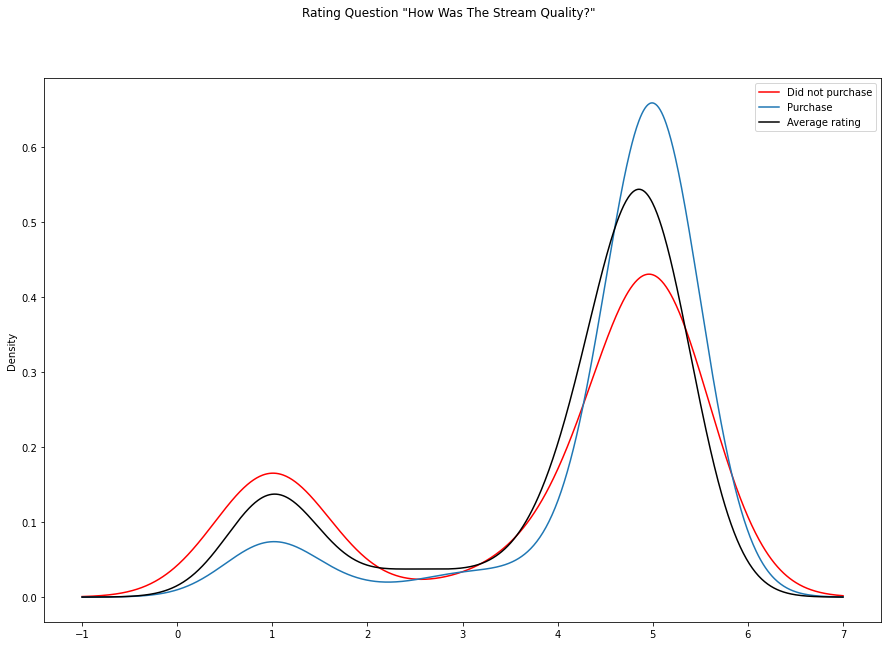

In [389]:
kde_yes_df = appointments_clean_df[appointments_clean_df['purchase_made_after_call'] == 'YES']
kde_no_df = appointments_clean_df[appointments_clean_df['purchase_made_after_call'] == 'NO']

kde_no_df['Rating_Question_"How_Was_The_Stream_Quality"'].plot.kde(subplots=True,title='Rating Question "How Was The Stream Quality?"',legend=True,label='Did not purchase',color='red',figsize=(15,10))
kde_yes_df['Rating_Question_"How_Was_The_Stream_Quality"'].plot.kde(subplots=True,label='Purchase',legend=True,figsize=(15,10))
appointments_clean_df['Avg_Customer_Rating_(Overall)'].plot.kde(subplots=True,label='Average rating',color='black',legend=True,figsize=(15,10))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fcbe580eca0>],
      dtype=object)

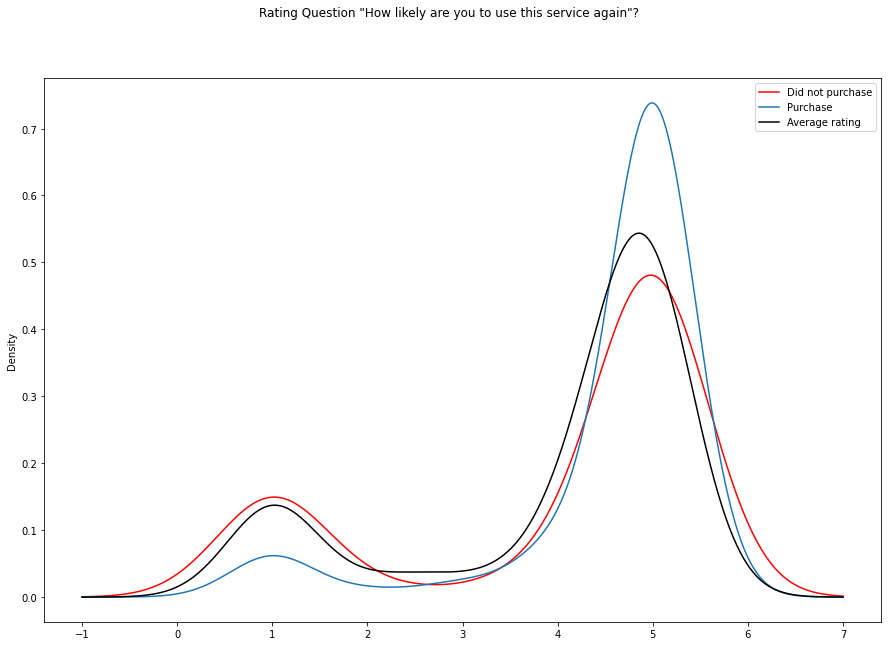

In [390]:
kde_yes_df = appointments_clean_df[appointments_clean_df['purchase_made_after_call'] == 'YES']
kde_no_df = appointments_clean_df[appointments_clean_df['purchase_made_after_call'] == 'NO']

kde_no_df['Rating_Question_"How_likely_are_you_to_use_this_service_again"?'].plot.kde(subplots=True,title='Rating Question "How likely are you to use this service again"?',label='Did not purchase',legend=True,color='red',figsize=(15,10))
kde_yes_df['Rating_Question_"How_likely_are_you_to_use_this_service_again"?'].plot.kde(subplots=True,label='Purchase',legend=True,figsize=(15,10))
appointments_clean_df['Avg_Customer_Rating_(Overall)'].plot.kde(subplots=True,label='Average rating',color='black',legend=True,figsize=(15,10))

In [391]:
appointments_clean_df['Customer_Id'].nunique()

453

In [392]:
appointments_clean_df['Call_Type'].value_counts()

BOOKING    894
Name: Call_Type, dtype: int64

#### Usage of Appointment Booking 

Below I wanted to explore whether customers that cancelled appointments were rebooking appointments for future dates, if not this would be an area that we could target, for example, by sending booking reminders to customers. Only one user "sinmbd7v-efk2-953m-ap0a-v4ir8w7epwov" had both ended and cancelled an appointment, but the cancelled appointment was forward of the ended appointment, so therefore not necessarily related in that way. 484 Customer IDs were missing from my working data set. From the remaining 510, only a small proportion were returning users/customers, so not much could be gleaned at this time using the available data.   

In [393]:
appointments_clean_df['Status'].value_counts()

ENDED        640
CANCELLED    180
CREATED       74
Name: Status, dtype: int64

In [394]:
Ended_df = appointments_clean_df[appointments_clean_df['Status'] == 'ENDED']
Cancelled_df = appointments_clean_df[appointments_clean_df['Status'] == 'CANCELLED']
Ended_df = Ended_df.dropna(subset =["Customer_Id"])
Cancelled_df = Cancelled_df.dropna(subset =["Customer_Id"])
Created_df = appointments_clean_df[appointments_clean_df['Status'] == 'CREATED']
Created_df = Created_df.dropna(subset =["Customer_Id"])

In [395]:
Rebooked_e_c_df = Ended_df[Ended_df.Customer_Id.isin(Cancelled_df.Customer_Id) == True]

In [396]:
Rebooked_c_e_df = Cancelled_df[Cancelled_df.Customer_Id.isin(Ended_df.Customer_Id) == True]

In [397]:
Rebooked_c_e_df

,Customer_Id,Call_Type,Date_Created_Local,Created_At_Local,Call_Started_Local,Scheduled_Start_Date_Local,Scheduled_Start_Time_Local,Scheduled_End_Time_Local,Status,Booking_Title,Booked_By_Staff_Id,Staff_First_Joined_Activity_Timestamps_Local,Staff_Joined_Activities_Timestamps_Local,Staff_Joined_Count,Staff_Left_Activities_Timestamps_UTC,Customer_Joined_Count,Customer_Joined_Activities_Timestamps_UTC,Customer_Left_Activities_Timestamps_UTC,Customer_Enabled_Video,Call_Result,Call_Duration_(Sec),Staff_Score,Avg_Customer_Rating_(Overall),"Rating_Question_""How_Was_The_Stream_Quality""","Rating_Question_""Did_you_find_your_rep_helpful?""","Rating_Question_""How_likely_are_you_to_use_this_service_again""?",purchase_made_after_call,purchase_value_usd,timestamp_of_checkout,days_between_call_and_purchase,Status_num
call_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7925690,sinmbd7v-efk2-953m-ap0a-v4ir8w7epwov,BOOKING,2021-10-02,2021-10-02 10:58:00,2021-10-02 11:00:00,2021-10-02,2021-10-02 11:00:00,2021-10-02 11:30:00,CANCELLED,Live expert booking - All Goods,21558,2021-10-02 11:00:00,10/02/2021 11:00,1,10/02/2021 11:00,1,10/02/2021 11:00,NaN,0,Booking - Successful call,5,NaN,NaN,NaN,NaN,NaN,NO,NaN,NaT,NaN,0


In [398]:
Rebooked_e_c_df

,Customer_Id,Call_Type,Date_Created_Local,Created_At_Local,Call_Started_Local,Scheduled_Start_Date_Local,Scheduled_Start_Time_Local,Scheduled_End_Time_Local,Status,Booking_Title,Booked_By_Staff_Id,Staff_First_Joined_Activity_Timestamps_Local,Staff_Joined_Activities_Timestamps_Local,Staff_Joined_Count,Staff_Left_Activities_Timestamps_UTC,Customer_Joined_Count,Customer_Joined_Activities_Timestamps_UTC,Customer_Left_Activities_Timestamps_UTC,Customer_Enabled_Video,Call_Result,Call_Duration_(Sec),Staff_Score,Avg_Customer_Rating_(Overall),"Rating_Question_""How_Was_The_Stream_Quality""","Rating_Question_""Did_you_find_your_rep_helpful?""","Rating_Question_""How_likely_are_you_to_use_this_service_again""?",purchase_made_after_call,purchase_value_usd,timestamp_of_checkout,days_between_call_and_purchase,Status_num
call_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
8147395,sinmbd7v-efk2-953m-ap0a-v4ir8w7epwov,BOOKING,2021-02-16,2021-02-16 12:25:00,2021-02-16 12:37:00,2021-02-16,2021-02-16 12:30:00,2021-02-16 12:40:00,ENDED,Live expert booking - All Goods,22017,2021-02-16 12:27:00,16/02/2021 12:27,1,16/02/2021 12:39,2,"2021-02-16 12:27:32, 2021-02-16 12:37:36","2021-02-16 12:33:18, 2021-02-16 12:39:05",1,Booking - Successful call,85,3.0,5.0,5.0,5.0,5.0,NO,NaN,NaT,NaN,2


In [399]:
Created_df[Created_df['Customer_Id'] == 'sinmbd7v-efk2-953m-ap0a-v4ir8w7epwov']

,Customer_Id,Call_Type,Date_Created_Local,Created_At_Local,Call_Started_Local,Scheduled_Start_Date_Local,Scheduled_Start_Time_Local,Scheduled_End_Time_Local,Status,Booking_Title,Booked_By_Staff_Id,Staff_First_Joined_Activity_Timestamps_Local,Staff_Joined_Activities_Timestamps_Local,Staff_Joined_Count,Staff_Left_Activities_Timestamps_UTC,Customer_Joined_Count,Customer_Joined_Activities_Timestamps_UTC,Customer_Left_Activities_Timestamps_UTC,Customer_Enabled_Video,Call_Result,Call_Duration_(Sec),Staff_Score,Avg_Customer_Rating_(Overall),"Rating_Question_""How_Was_The_Stream_Quality""","Rating_Question_""Did_you_find_your_rep_helpful?""","Rating_Question_""How_likely_are_you_to_use_this_service_again""?",purchase_made_after_call,purchase_value_usd,timestamp_of_checkout,days_between_call_and_purchase,Status_num
call_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


In [400]:
Rebooked_c_cr_df = Cancelled_df[Cancelled_df.Customer_Id.isin(Created_df.Customer_Id) == True]
Rebooked_cr_c_df = Created_df[Created_df.Customer_Id.isin(Cancelled_df.Customer_Id) == True]

In [401]:
Rebooked_c_cr_df

,Customer_Id,Call_Type,Date_Created_Local,Created_At_Local,Call_Started_Local,Scheduled_Start_Date_Local,Scheduled_Start_Time_Local,Scheduled_End_Time_Local,Status,Booking_Title,Booked_By_Staff_Id,Staff_First_Joined_Activity_Timestamps_Local,Staff_Joined_Activities_Timestamps_Local,Staff_Joined_Count,Staff_Left_Activities_Timestamps_UTC,Customer_Joined_Count,Customer_Joined_Activities_Timestamps_UTC,Customer_Left_Activities_Timestamps_UTC,Customer_Enabled_Video,Call_Result,Call_Duration_(Sec),Staff_Score,Avg_Customer_Rating_(Overall),"Rating_Question_""How_Was_The_Stream_Quality""","Rating_Question_""Did_you_find_your_rep_helpful?""","Rating_Question_""How_likely_are_you_to_use_this_service_again""?",purchase_made_after_call,purchase_value_usd,timestamp_of_checkout,days_between_call_and_purchase,Status_num
call_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


In [402]:
Rebooked_cr_c_df

,Customer_Id,Call_Type,Date_Created_Local,Created_At_Local,Call_Started_Local,Scheduled_Start_Date_Local,Scheduled_Start_Time_Local,Scheduled_End_Time_Local,Status,Booking_Title,Booked_By_Staff_Id,Staff_First_Joined_Activity_Timestamps_Local,Staff_Joined_Activities_Timestamps_Local,Staff_Joined_Count,Staff_Left_Activities_Timestamps_UTC,Customer_Joined_Count,Customer_Joined_Activities_Timestamps_UTC,Customer_Left_Activities_Timestamps_UTC,Customer_Enabled_Video,Call_Result,Call_Duration_(Sec),Staff_Score,Avg_Customer_Rating_(Overall),"Rating_Question_""How_Was_The_Stream_Quality""","Rating_Question_""Did_you_find_your_rep_helpful?""","Rating_Question_""How_likely_are_you_to_use_this_service_again""?",purchase_made_after_call,purchase_value_usd,timestamp_of_checkout,days_between_call_and_purchase,Status_num
call_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


In [403]:
Cancelled_df.dropna(subset=['Customer_Id'])

,Customer_Id,Call_Type,Date_Created_Local,Created_At_Local,Call_Started_Local,Scheduled_Start_Date_Local,Scheduled_Start_Time_Local,Scheduled_End_Time_Local,Status,Booking_Title,Booked_By_Staff_Id,Staff_First_Joined_Activity_Timestamps_Local,Staff_Joined_Activities_Timestamps_Local,Staff_Joined_Count,Staff_Left_Activities_Timestamps_UTC,Customer_Joined_Count,Customer_Joined_Activities_Timestamps_UTC,Customer_Left_Activities_Timestamps_UTC,Customer_Enabled_Video,Call_Result,Call_Duration_(Sec),Staff_Score,Avg_Customer_Rating_(Overall),"Rating_Question_""How_Was_The_Stream_Quality""","Rating_Question_""Did_you_find_your_rep_helpful?""","Rating_Question_""How_likely_are_you_to_use_this_service_again""?",purchase_made_after_call,purchase_value_usd,timestamp_of_checkout,days_between_call_and_purchase,Status_num
call_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
9837750,8pylfacs-jpok-sdah-1q9p-l3djv4a1vdla,BOOKING,2021-04-14,2021-04-14 11:40:00,NaT,2021-04-15,2021-04-15 16:30:00,2021-04-15 16:45:00,CANCELLED,Live expert booking - All Goods,22852,NaT,NaN,0,NaN,4,"2021-04-15 16:27:30, 2021-04-15 16:31:45, 2021...",NaN,1,Booking - Consumer joined clerk did not joined,0,NaN,NaN,NaN,NaN,NaN,NO,NaN,NaT,NaN,0
7925690,sinmbd7v-efk2-953m-ap0a-v4ir8w7epwov,BOOKING,2021-10-02,2021-10-02 10:58:00,2021-10-02 11:00:00,2021-10-02,2021-10-02 11:00:00,2021-10-02 11:30:00,CANCELLED,Live expert booking - All Goods,21558,2021-10-02 11:00:00,10/02/2021 11:00,1,10/02/2021 11:00,1,10/02/2021 11:00,NaN,0,Booking - Successful call,5,NaN,NaN,NaN,NaN,NaN,NO,NaN,NaT,NaN,0


In [404]:
len(Created_df.dropna(subset=['Customer_Id']))

46

In [405]:
appointments_clean_df['Booking_Title'].value_counts()

Live expert booking - All Goods    894
Name: Booking_Title, dtype: int64

#### Staff

In [406]:
appointments_clean_df['Booked_By_Staff_Id'].value_counts()

21998    211
22017    128
21556    124
21557    109
21555     62
22851     55
22613     55
22853     41
22337     31
21558     28
22854     21
22852     15
22858     14
Name: Booked_By_Staff_Id, dtype: int64

In [407]:
Rep_rate = appointments_clean_df[['Rating_Question_"Did_you_find_your_rep_helpful?"','Booked_By_Staff_Id','Staff_Joined_Count','Customer_Joined_Count']].dropna()

In [408]:
Rep_rate = Rep_rate.groupby(['Booked_By_Staff_Id']).mean()

In [409]:
appointments_clean_df[['Booked_By_Staff_Id', 'Staff_Score']].dropna().value_counts()

Booked_By_Staff_Id  Staff_Score
21998               3.0            79
22017               3.0            68
21998               1.0            60
                    4.0            40
22017               1.0            36
21557               4.0            35
21556               3.0            28
21557               1.0            28
21556               1.0            27
22851               3.0            27
22853               3.0            21
22337               3.0            19
21557               3.0            19
22851               1.0            14
22854               3.0            11
22613               1.0            10
21556               4.0             9
22853               1.0             9
22858               4.0             9
22017               4.0             9
22613               3.0             7
                    4.0             4
22852               1.0             4
                    3.0             3
22337               1.0             3
22854             

In [410]:
Rep_rate.sort_values(by=['Rating_Question_"Did_you_find_your_rep_helpful?"'],ascending=False)

,"Rating_Question_""Did_you_find_your_rep_helpful?""",Staff_Joined_Count,Customer_Joined_Count
Booked_By_Staff_Id,,,
22858,4.500000,1.000000,1.000000
22017,4.386364,1.090909,1.386364
21998,4.250000,1.653846,1.865385
22853,4.250000,1.125000,1.687500
21557,3.973684,0.973684,1.342105
22337,3.571429,1.000000,1.857143
21555,3.478261,1.086957,1.739130
21556,3.473684,1.157895,1.605263
22851,3.166667,1.111111,1.388889


In [411]:
staff_score1 = appointments_clean_df.loc[appointments_clean_df['Staff_Score']== 1,['Rating_Question_"Did_you_find_your_rep_helpful?"', 'Booked_By_Staff_Id']].dropna()
staff_score2 = appointments_clean_df.loc[appointments_clean_df['Staff_Score']== 2,['Rating_Question_"Did_you_find_your_rep_helpful?"', 'Booked_By_Staff_Id']].dropna()
staff_score3 = appointments_clean_df.loc[appointments_clean_df['Staff_Score']== 3,['Rating_Question_"Did_you_find_your_rep_helpful?"', 'Booked_By_Staff_Id']].dropna()
staff_score4 = appointments_clean_df.loc[appointments_clean_df['Staff_Score']== 4,['Rating_Question_"Did_you_find_your_rep_helpful?"', 'Booked_By_Staff_Id']].dropna()

In [412]:
staff_score1 = staff_score1.groupby(by=['Booked_By_Staff_Id']).mean()

In [413]:
staff_score1['Rating_Question_"Did_you_find_your_rep_helpful?"']

Booked_By_Staff_Id
21556    5.0
21557    1.0
21998    1.0
22017    1.0
22337    3.0
22613    1.0
22851    1.0
22854    2.0
Name: Rating_Question_"Did_you_find_your_rep_helpful?", dtype: float64

In [414]:
Staff_21556_1 = 5.0
Staff_21557_1 = 1.0
Staff_21998_1 = 1.0
Staff_22017_1 = 1.0
Staff_22337_1 = 3.0
Staff_22613_1 = 1.0
Staff_22851_1 = 1.0
Staff_22854_1 = 2.0

In [415]:
staff_score2 = staff_score2.groupby(by=['Booked_By_Staff_Id']).mean()

In [416]:
staff_score2['Rating_Question_"Did_you_find_your_rep_helpful?"']

Booked_By_Staff_Id
21998    2.0
22613    4.0
Name: Rating_Question_"Did_you_find_your_rep_helpful?", dtype: float64

In [417]:
staff_score3 = staff_score3.groupby(by=['Booked_By_Staff_Id']).mean()

In [418]:
staff_score3['Rating_Question_"Did_you_find_your_rep_helpful?"']

Booked_By_Staff_Id
21556    4.315789
21557    4.181818
21998    4.333333
22017    4.388889
22337    3.400000
22613    3.666667
22851    3.357143
22852    3.000000
22853    4.500000
22854    3.000000
Name: Rating_Question_"Did_you_find_your_rep_helpful?", dtype: float64

In [419]:
staff_score4 = staff_score4.groupby(by=['Booked_By_Staff_Id']).mean()

In [420]:
staff_score4['Rating_Question_"Did_you_find_your_rep_helpful?"']

Booked_By_Staff_Id
21556    4.857143
21557    4.250000
21998    4.562500
22017    4.857143
22613    4.000000
22851    3.000000
22852    4.000000
22858    4.500000
Name: Rating_Question_"Did_you_find_your_rep_helpful?", dtype: float64

In [421]:
appointments_clean_df['Booked_By_Staff_Id'].unique()

array([21998, 22017, 21556, 21557, 22853, 22851, 21555, 22613, 22858,
       22337, 22854, 22852, 21558])

In [422]:
staff1_list = ['21998','22017','21556','21557','22851','22613','22337','22854']
staff2_list = ['21998', '22613']  
staff3_list = ['21556', '21557','21998','22017','22337','22613','22851','22852','22853','22854']
staff4_list = ['21556','21557','21998','22017','22613','22851','22852','22858']

x_pos1 = range(len(staff1_list))
x_pos2 = range(len(staff2_list))
x_pos3 = range(len(staff3_list))
x_pos4 = range(len(staff4_list))

In [423]:
Staff_21556_1 = 5.0
Staff_21557_1 = 1.0
Staff_21998_1 = 1.0
Staff_22017_1 = 1.0
Staff_22337_1 = 3.0
Staff_22613_1 = 1.0
Staff_22851_1 = 1.0
Staff_22854_1 = 2.0

Staff_21998_2 = 2.0
Staff_22613_2 = 4.0

Staff_21556_3 = 4.3
Staff_21557_3 = 4.9
Staff_21998_3 = 4.3
Staff_22017_3 = 4.4
Staff_22337_3 = 3.4
Staff_22613_3 = 3.7
Staff_22851_3 = 3.4
Staff_22852_3 = 3.0
Staff_22853_3 = 4.5
Staff_22854_3 = 3.0

Staff_21556_4 = 4.9
Staff_21557_4 = 4.3
Staff_21998_4 = 4.6
Staff_22017_4 = 4.9
Staff_22613_4 = 4.0
Staff_22851_4 = 3.0
Staff_22852_4 = 4.0
Staff_22858_4 = 4.5

In [424]:
Staff1 = [Staff_21556_1, Staff_21557_1, Staff_21998_1, Staff_22017_1, Staff_22337_1, Staff_22613_1, Staff_22851_1, Staff_22854_1]
Staff2 = [Staff_21998_2,Staff_22613_2]
Staff3 = [Staff_21556_3, Staff_21557_3, Staff_21998_3, Staff_22017_3, Staff_22337_3, Staff_22613_3, Staff_22851_3, Staff_22852_3, Staff_22853_3, Staff_22854_3]
Staff4 = [Staff_21556_4, Staff_21557_4, Staff_21998_4, Staff_22017_4, Staff_22613_4, Staff_22851_4, Staff_22852_4, Staff_22858_4]

##### More Interaction, Higher Rating?

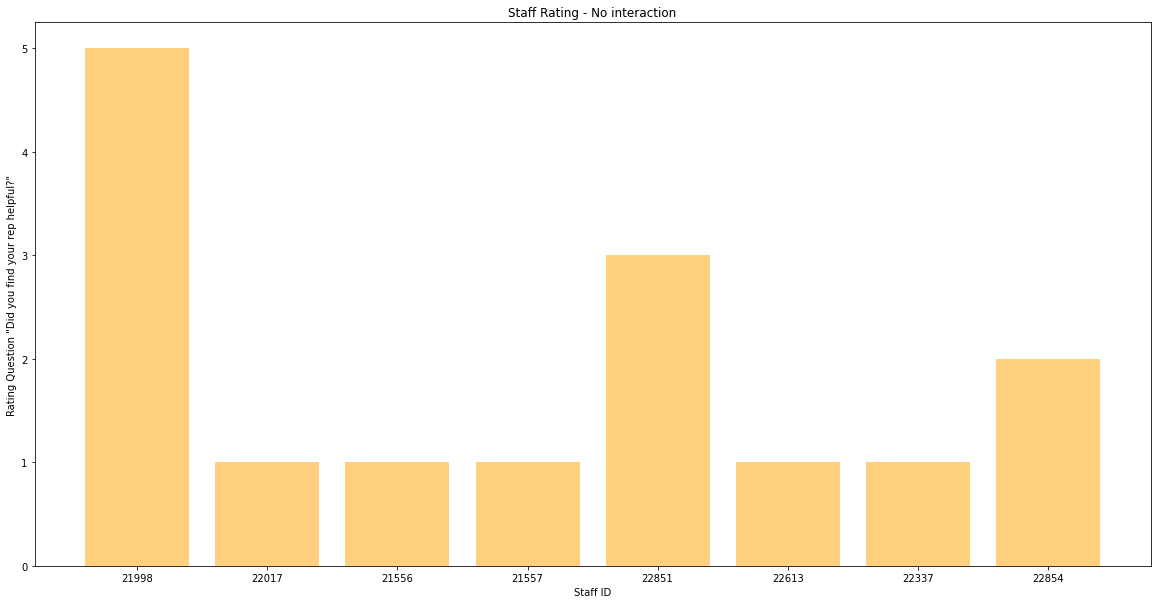

In [425]:
fig,ax = plt.subplots(figsize=[20,10])
ax.bar(x_pos1, Staff1 ,align = 'center', alpha=0.5, color='orange')
ax.set_xlabel("Staff ID", fontsize= 10)
ax.set_ylabel('Rating Question "Did you find your rep helpful?"', fontsize= 10)
ax.set_title('Staff Rating - No interaction')
ax.set_xticks(x_pos1)
ax.set_xticklabels(staff1_list)

plt.show()

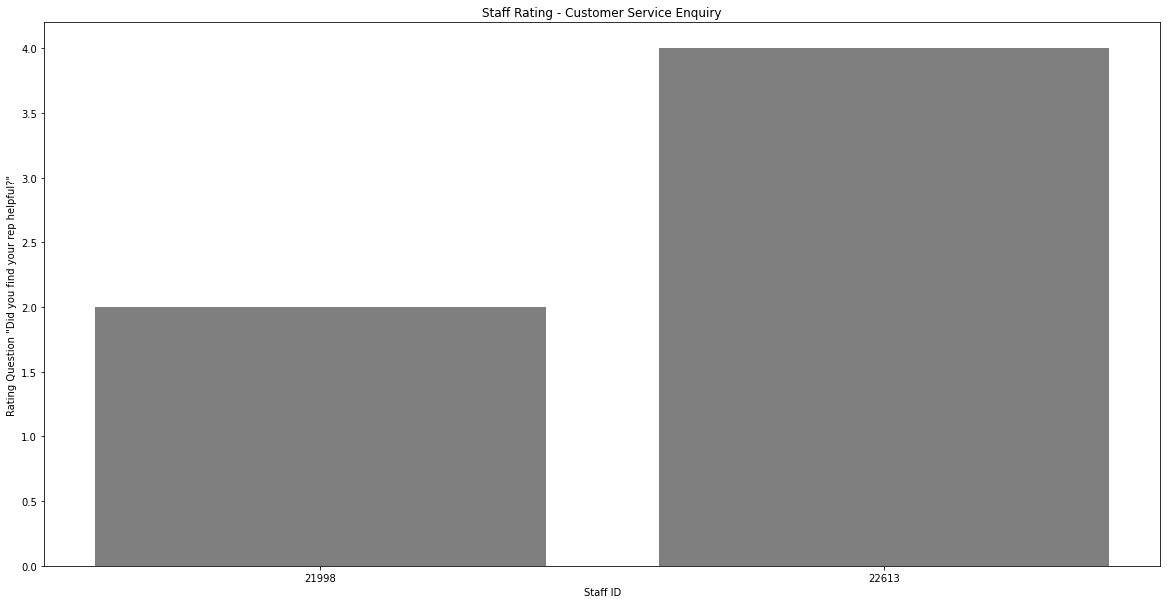

In [426]:
fig, ax = plt.subplots(figsize=[20, 10])
ax.bar(x_pos2, Staff2, align='center', alpha=0.5, color='black')
ax.set_xlabel("Staff ID", fontsize= 10)
ax.set_ylabel('Rating Question "Did you find your rep helpful?"', fontsize= 10)
ax.set_title('Staff Rating - Customer Service Enquiry')
ax.set_xticks(x_pos2)
ax.set_xticklabels(staff2_list)

plt.show()

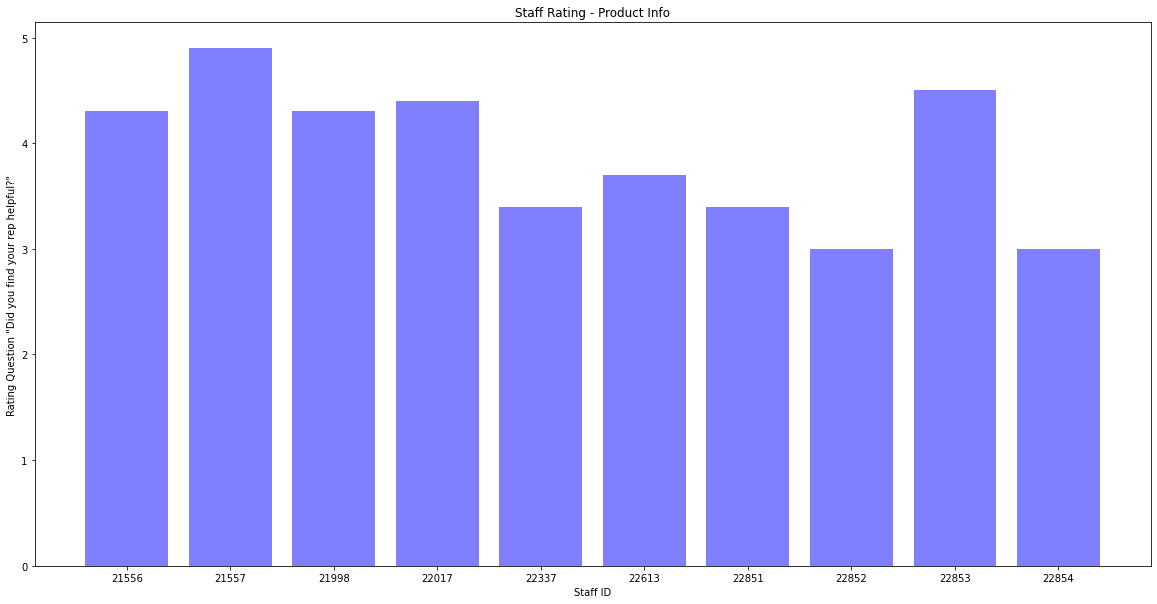

In [427]:
fig,ax = plt.subplots(figsize=[20,10])
ax.bar(x_pos3, Staff3, align='center', alpha=0.5, color='blue')
ax.set_xlabel("Staff ID", fontsize= 10)
ax.set_ylabel('Rating Question "Did you find your rep helpful?"', fontsize= 10)
ax.set_title('Staff Rating - Product Info')
ax.set_xticks(x_pos3)
ax.set_xticklabels(staff3_list)

plt.show()

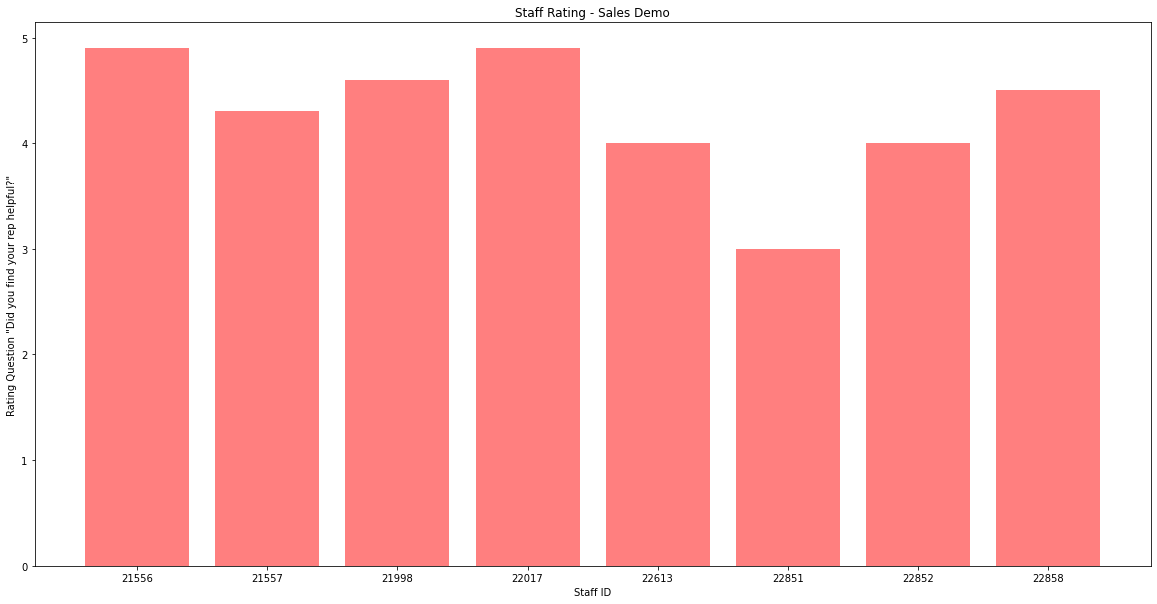

In [428]:
fig,ax = plt.subplots(figsize=[20,10])
ax.bar(x_pos4, Staff4, align='center', alpha=0.5, color='red')
ax.set_xlabel("Staff ID", fontsize= 10)
ax.set_ylabel('Rating Question "Did you find your rep helpful?"', fontsize= 10)
ax.set_title('Staff Rating - Sales Demo')
ax.set_xticks(x_pos4)
ax.set_xticklabels(staff4_list)

plt.show()

#### Outliers

Used 1.5 multiplied by the interquartile range to remove observed outliers in the follwing: Staff Count, Customer Count, Call Duration. While these data points are informative they lie outside of the expected range and would influence further analysis.

In [429]:
appointments_clean_df.describe()

,Booked_By_Staff_Id,Staff_Joined_Count,Customer_Joined_Count,Customer_Enabled_Video,Call_Duration_(Sec),Staff_Score,Avg_Customer_Rating_(Overall),"Rating_Question_""How_Was_The_Stream_Quality""","Rating_Question_""Did_you_find_your_rep_helpful?""","Rating_Question_""How_likely_are_you_to_use_this_service_again""?",purchase_value_usd,days_between_call_and_purchase,Status_num
count,894.000000,894.000000,894.000000,894.000000,894.000000,592.000000,264.000000,264.000000,264.000000,264.000000,137.000000,137.000000,894.000000
mean,22030.325503,0.956376,0.898210,0.491051,397.206935,2.515203,4.022879,4.060606,3.818182,4.189394,809.309562,7.364964,1.514541
std,465.086631,0.867026,1.352587,0.500200,1147.311344,1.129412,1.469082,1.590167,1.534487,1.511087,825.865803,8.217517,0.808210
min,21555.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,0.000000,0.000000
25%,21557.000000,0.000000,0.000000,0.000000,0.000000,1.000000,4.000000,4.000000,3.000000,4.000000,74.900000,1.000000,1.000000
50%,21998.000000,1.000000,1.000000,0.000000,0.000000,3.000000,4.670000,5.000000,5.000000,5.000000,597.000000,4.000000,2.000000
75%,22337.000000,1.000000,1.000000,1.000000,596.750000,3.000000,5.000000,5.000000,5.000000,5.000000,1359.200000,12.000000,2.000000
max,22858.000000,6.000000,18.000000,1.000000,29808.000000,4.000000,5.000000,5.000000,5.000000,5.000000,3304.600000,28.000000,2.000000


In [430]:
q1 = appointments_clean_df.quantile(0.25)
q3 =appointments_clean_df.quantile(0.75)
IQR = q3 - q1
print(IQR)

Booked_By_Staff_Id                                                  780.00
Staff_Joined_Count                                                    1.00
Customer_Joined_Count                                                 1.00
Customer_Enabled_Video                                                1.00
Call_Duration_(Sec)                                                 596.75
Staff_Score                                                           2.00
Avg_Customer_Rating_(Overall)                                         1.00
Rating_Question_"How_Was_The_Stream_Quality"                          1.00
Rating_Question_"Did_you_find_your_rep_helpful?"                      2.00
Rating_Question_"How_likely_are_you_to_use_this_service_again"?       1.00
purchase_value_usd                                                 1284.30
days_between_call_and_purchase                                       11.00
Status_num                                                            1.00
dtype: float64


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fcbe212e670>],
      dtype=object)

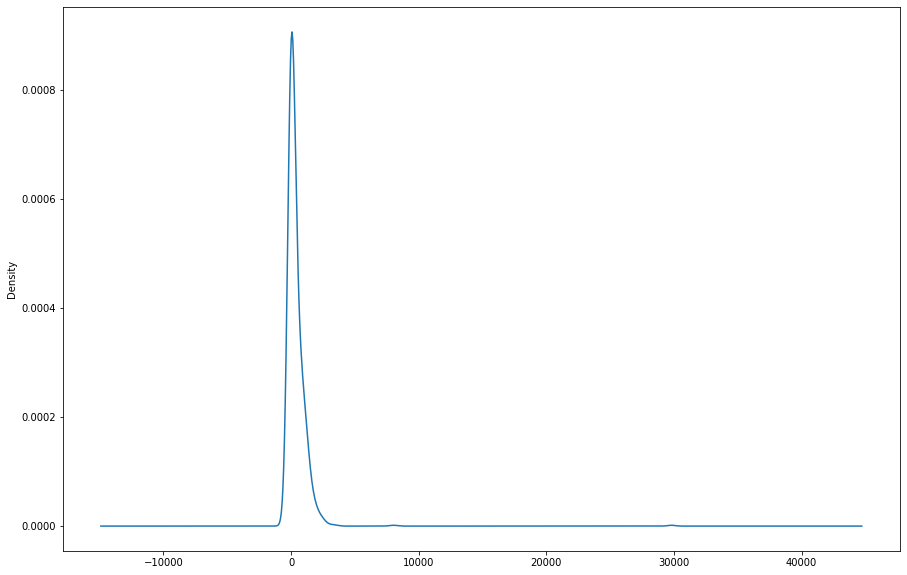

In [431]:
appointments_clean_df['Call_Duration_(Sec)'].plot.kde(subplots=True,figsize=(15,10))

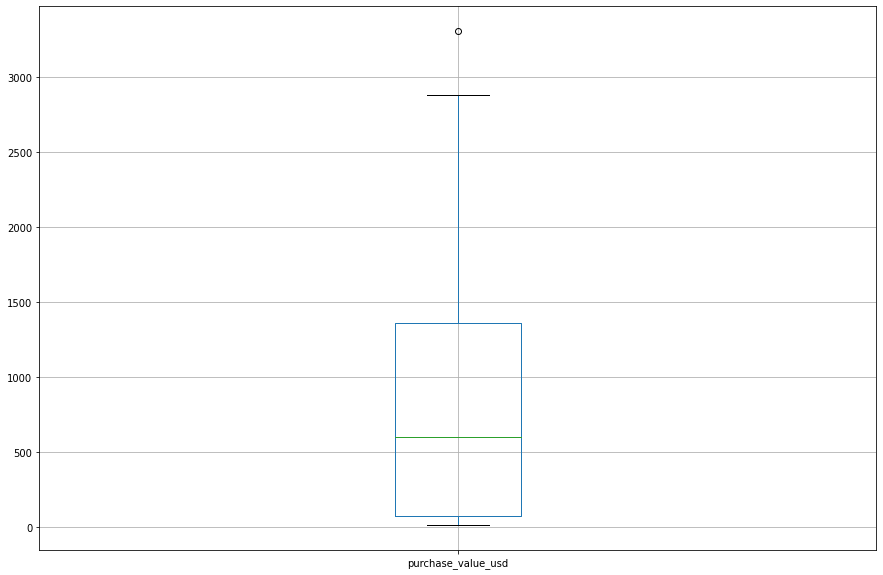

In [432]:
appointments_clean_df.boxplot(column= ['purchase_value_usd'],figsize=(15,10))

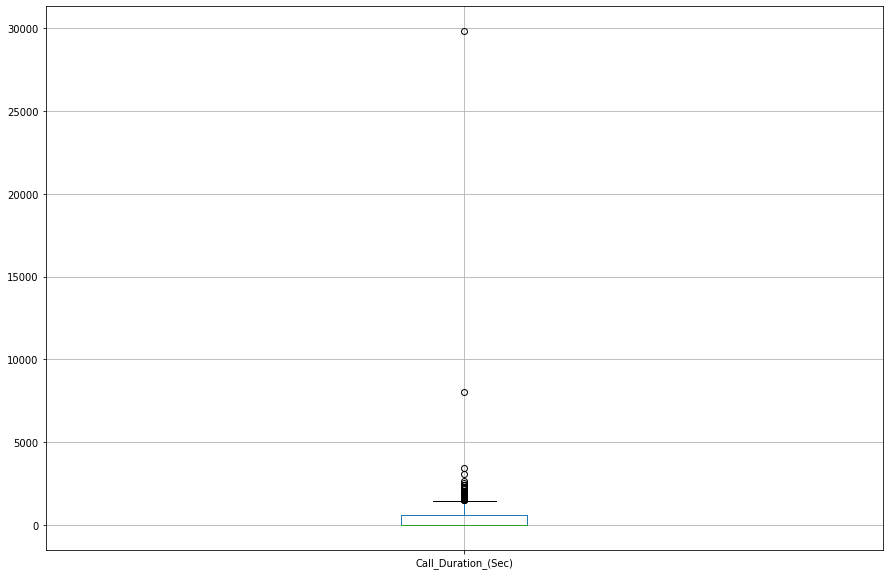

In [433]:
appointments_clean_df.boxplot(column=['Call_Duration_(Sec)'], figsize=(15,10))

In [434]:
appointments_clean_df.loc[appointments_clean_df['Customer_Joined_Count']> 4, ['purchase_made_after_call']]

,purchase_made_after_call
call_id,
8144014,NO
8293766,NO
8293766,NO
8295299,NO
8458684,NO
8458684,NO
9534229,NO
9680279,NO
10043147,NO


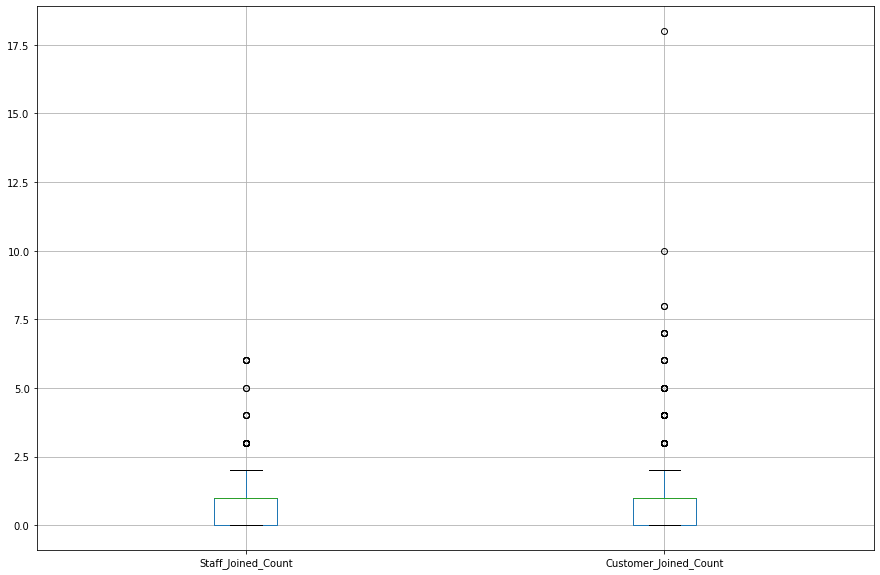

In [435]:
appointments_clean_df.boxplot(column=['Staff_Joined_Count', 'Customer_Joined_Count'], figsize=(15,10))

In [436]:
Call_q1 = appointments_clean_df['Call_Duration_(Sec)'].quantile(0.25)
Call_q3 = appointments_clean_df['Call_Duration_(Sec)'].quantile(0.75)
Call_IQR = Call_q3 - Call_q1
Call_mean = appointments_clean_df['Call_Duration_(Sec)'].mean()
Call_upper = Call_q3 + (1.5 * Call_IQR)

In [437]:
appointments_clean_df.loc[appointments_clean_df['Call_Duration_(Sec)'] > 5000, 'Call_Duration_(Sec)'] = Call_mean

In [438]:
SC_q1 = appointments_clean_df['Staff_Joined_Count'].quantile(0.25)
SC_q3 = appointments_clean_df['Staff_Joined_Count'].quantile(0.75)
SC_IQR = SC_q3 - SC_q1
SC_upper = SC_q3 + (1.5 * SC_IQR)

In [439]:
appointments_clean_df.loc[appointments_clean_df.Staff_Joined_Count > SC_upper, 'Staff_Joined_Count'] = SC_upper

In [440]:
appointments_clean_df['Staff_Joined_Count'].max()

2.5

In [441]:
CC_q1 = appointments_clean_df['Customer_Joined_Count'].quantile(0.25)
CC_q3 = appointments_clean_df['Customer_Joined_Count'].quantile(0.75)
CC_IQR = CC_q3 - CC_q1
CC_upper = CC_q3 + (1.5 * CC_IQR)

In [442]:
appointments_clean_df.loc[appointments_clean_df.Customer_Joined_Count > CC_upper, 'Customer_Joined_Count'] = CC_upper

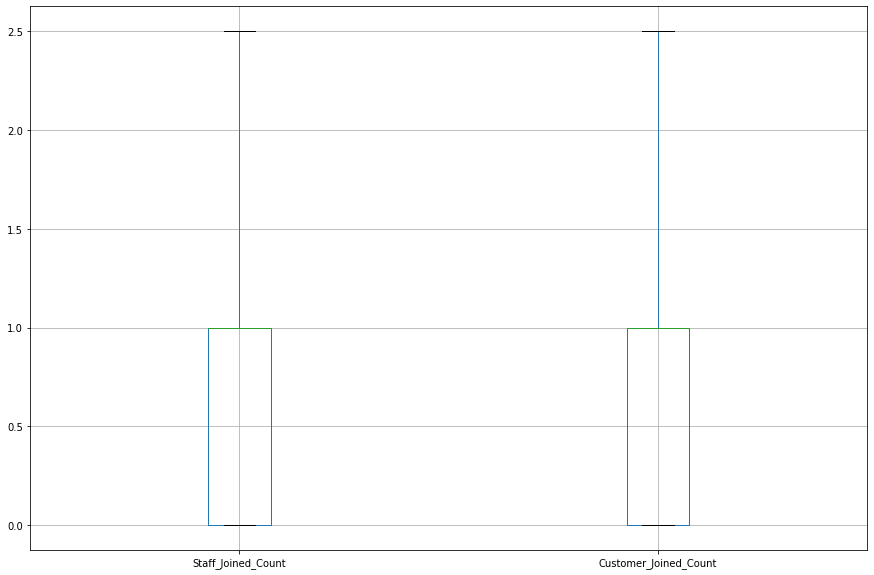

In [443]:
boxplot_df = appointments_clean_df.boxplot(column=['Staff_Joined_Count', 'Customer_Joined_Count'], figsize=(15,10))

In [444]:
(appointments_clean_df[['Customer_Joined_Count','Staff_Joined_Count']] > 2).value_counts()

Customer_Joined_Count  Staff_Joined_Count
False                  False                 795
True                   False                  57
False                  True                   25
True                   True                   17
dtype: int64

In [445]:
(appointments_clean_df['Staff_Joined_Count'] > 2).value_counts()

False    852
True      42
Name: Staff_Joined_Count, dtype: int64

In [446]:
(appointments_clean_df['Customer_Joined_Count'] > 2).value_counts()

False    820
True      74
Name: Customer_Joined_Count, dtype: int64

#### Mann-Whitney U Rank Test

Test null hypothesis that there is no difference between the following means:
Customer join count and no purchase 
Customer join count and purchase

p=1.158254502056017e-21: reject null hypothesis

In [447]:
appointments_clean_df.loc[appointments_clean_df['purchase_made_after_call']=='YES',['Customer_Joined_Count']].mean()

Customer_Joined_Count    1.229927
dtype: float64

In [448]:
s1 = appointments_clean_df.loc[appointments_clean_df['purchase_made_after_call']=='YES',['Customer_Joined_Count']]

In [449]:
appointments_clean_df.loc[appointments_clean_df['purchase_made_after_call']=='NO',['Customer_Joined_Count']].mean()

Customer_Joined_Count    0.65852
dtype: float64

In [450]:
s2 = appointments_clean_df.loc[appointments_clean_df['purchase_made_after_call']=='NO',['Customer_Joined_Count']]

In [451]:
U1, p = scipy.stats.mannwhitneyu(s1,s2)

In [452]:
U1

27612.5

In [453]:
p

1.158254502056017e-21

In [454]:
appointments_clean_df['Call_Result'].value_counts()

Booking - Successful call                                             436
Booking - No one joined                                               205
Booking - Clerk joined consumer did not join                          191
Booking - Consumer joined clerk did not joined                         49
Booking - Consumer and clerk join but not present at the same time     13
Name: Call_Result, dtype: int64

In [455]:
appointments_clean_df['Booking_Title'].value_counts()

Live expert booking - All Goods    894
Name: Booking_Title, dtype: int64

In [456]:
 appointments_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 894 entries, 10653788 to 7925690
Data columns (total 31 columns):
 #   Column                                                           Non-Null Count  Dtype         
---  ------                                                           --------------  -----         
 0   Customer_Id                                                      510 non-null    object        
 1   Call_Type                                                        894 non-null    object        
 2   Date_Created_Local                                               894 non-null    datetime64[ns]
 3   Created_At_Local                                                 894 non-null    datetime64[ns]
 4   Call_Started_Local                                               443 non-null    datetime64[ns]
 5   Scheduled_Start_Date_Local                                       894 non-null    datetime64[ns]
 6   Scheduled_Start_Time_Local                                       894 no

In [457]:
appointments_clean_df_copy = appointments_clean_df

In [458]:
appointments_clean_df_copy = appointments_clean_df_copy.drop(['Call_Type', 'Booking_Title', 'Rating_Question_"How_Was_The_Stream_Quality"', 'Rating_Question_"Did_you_find_your_rep_helpful?"','Rating_Question_"How_likely_are_you_to_use_this_service_again"?'], axis=1)

### Impute Missing Values

I have replaced null values with reasonable replacements. For some features I have used the mean or median. If the value is dependent on whether there was a call and this was negative then I may have used 0. For categorical data I have created another class, such as 'unkown ' for Call result.

In [459]:
appointments_df_complete = appointments_clean_df_copy.dropna()

In [460]:
appointments_df_complete.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46 entries, 9855287 to 8144434
Data columns (total 26 columns):
 #   Column                                        Non-Null Count  Dtype         
---  ------                                        --------------  -----         
 0   Customer_Id                                   46 non-null     object        
 1   Date_Created_Local                            46 non-null     datetime64[ns]
 2   Created_At_Local                              46 non-null     datetime64[ns]
 3   Call_Started_Local                            46 non-null     datetime64[ns]
 4   Scheduled_Start_Date_Local                    46 non-null     datetime64[ns]
 5   Scheduled_Start_Time_Local                    46 non-null     datetime64[ns]
 6   Scheduled_End_Time_Local                      46 non-null     datetime64[ns]
 7   Status                                        46 non-null     object        
 8   Booked_By_Staff_Id                            46 non-null    

In [461]:
appointments_clean_df_copy['Staff_Score'] = appointments_clean_df_copy['Staff_Score'].fillna(value=0)

In [462]:
appointments_clean_df_copy

,Customer_Id,Date_Created_Local,Created_At_Local,Call_Started_Local,Scheduled_Start_Date_Local,Scheduled_Start_Time_Local,Scheduled_End_Time_Local,Status,Booked_By_Staff_Id,Staff_First_Joined_Activity_Timestamps_Local,Staff_Joined_Activities_Timestamps_Local,Staff_Joined_Count,Staff_Left_Activities_Timestamps_UTC,Customer_Joined_Count,Customer_Joined_Activities_Timestamps_UTC,Customer_Left_Activities_Timestamps_UTC,Customer_Enabled_Video,Call_Result,Call_Duration_(Sec),Staff_Score,Avg_Customer_Rating_(Overall),purchase_made_after_call,purchase_value_usd,timestamp_of_checkout,days_between_call_and_purchase,Status_num
call_id,,,,,,,,,,,,,,,,,,,,,,,,,,
10653788,fk3nlsty-g7lu-ig6q-xli8-q1rjko1eh09c,2021-05-26,2021-05-26 15:52:00,2021-05-28 10:19:00,2021-05-28,2021-05-28 10:15:00,2021-05-28 10:25:00,ENDED,21998,2021-05-28 10:12:00,"2021-05-28 10:12:17, 2021-05-28 10:15:11, 2021...",2.5,"2021-05-28 10:15:07, 2021-05-28 10:17:04, 2021...",1.0,28/05/2021 10:19,NaN,0,Booking - Successful call,147.0,3.0,NaN,YES,23.6,2021-01-06 13:21:00,4.0,2
10343190,kk4w9y59-suss-ampm-4pox-oj2qhv0py3t4,2021-08-05,2021-08-05 23:04:00,2021-12-05 16:45:00,2021-12-05,2021-12-05 16:45:00,2021-12-05 16:55:00,ENDED,22017,2021-12-05 16:41:00,12/05/2021 16:41,1.0,12/05/2021 16:51,1.0,12/05/2021 16:45,NaN,1,Booking - Successful call,356.0,3.0,5.0,YES,597.0,2021-05-16 20:34:00,4.0,2
9647059,6vzngogp-dd3d-yllc-3zsc-gb3wui8cnsfo,2021-06-04,2021-06-04 16:53:00,2021-07-04 17:14:00,2021-07-04,2021-07-04 17:00:00,2021-07-04 17:10:00,ENDED,22017,2021-07-04 16:58:00,07/04/2021 16:58,1.0,07/04/2021 17:32,2.0,"2021-04-07 17:01:10, 2021-04-07 17:13:54",NaN,1,Booking - Successful call,2427.0,4.0,5.0,YES,27.5,2021-02-05 14:10:00,25.0,2
9647059,6vzngogp-dd3d-yllc-3zsc-gb3wui8cnsfo,2021-06-04,2021-06-04 16:53:00,2021-07-04 17:14:00,2021-07-04,2021-07-04 17:00:00,2021-07-04 17:10:00,ENDED,22017,2021-07-04 16:58:00,07/04/2021 16:58,1.0,07/04/2021 17:32,2.0,"2021-04-07 17:01:10, 2021-04-07 17:13:54",NaN,1,Booking - Successful call,2427.0,4.0,5.0,YES,39.0,2021-04-24 10:57:00,17.0,2
9709891,6l13g0kj-g0pa-hbw7-xshv-5ekgl2111yo6,2021-08-04,2021-08-04 18:10:00,2021-09-04 18:07:00,2021-09-04,2021-09-04 18:00:00,2021-09-04 18:15:00,ENDED,21998,2021-09-04 18:07:00,09/04/2021 18:07,1.0,09/04/2021 18:15,1.0,09/04/2021 17:59,NaN,1,Booking - Successful call,524.0,3.0,4.0,YES,179.0,2021-04-23 08:23:00,14.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11111696,NaN,2021-06-25,2021-06-25 17:06:00,NaT,2021-06-26,2021-06-26 17:30:00,2021-06-26 17:40:00,CANCELLED,21998,NaT,NaN,0.0,NaN,0.0,NaN,NaN,0,Booking - No one joined,0.0,0.0,NaN,NO,NaN,NaT,NaN,0
11144660,NaN,2021-06-28,2021-06-28 11:19:00,NaT,2021-06-29,2021-06-29 16:30:00,2021-06-29 16:40:00,CANCELLED,22613,NaT,NaN,0.0,NaN,0.0,NaN,NaN,0,Booking - No one joined,0.0,0.0,NaN,NO,NaN,NaT,NaN,0
11144933,NaN,2021-06-28,2021-06-28 11:30:00,NaT,2021-06-29,2021-06-29 11:30:00,2021-06-29 11:40:00,CANCELLED,21557,NaT,NaN,0.0,NaN,0.0,NaN,NaN,0,Booking - No one joined,0.0,0.0,NaN,NO,NaN,NaT,NaN,0


In [463]:
appointments_clean_df_copy.loc[appointments_clean_df_copy['Customer_Id'].isnull(), 'Customer_Id'] = appointments_clean_df_copy.loc[appointments_clean_df_copy['Customer_Id'].isnull()].index

In [464]:
appointments_clean_df_copy = appointments_clean_df_copy.drop(['Staff_First_Joined_Activity_Timestamps_Local','Staff_Joined_Activities_Timestamps_Local','timestamp_of_checkout','Staff_Left_Activities_Timestamps_UTC','Customer_Joined_Activities_Timestamps_UTC','Customer_Left_Activities_Timestamps_UTC' ],axis=1)

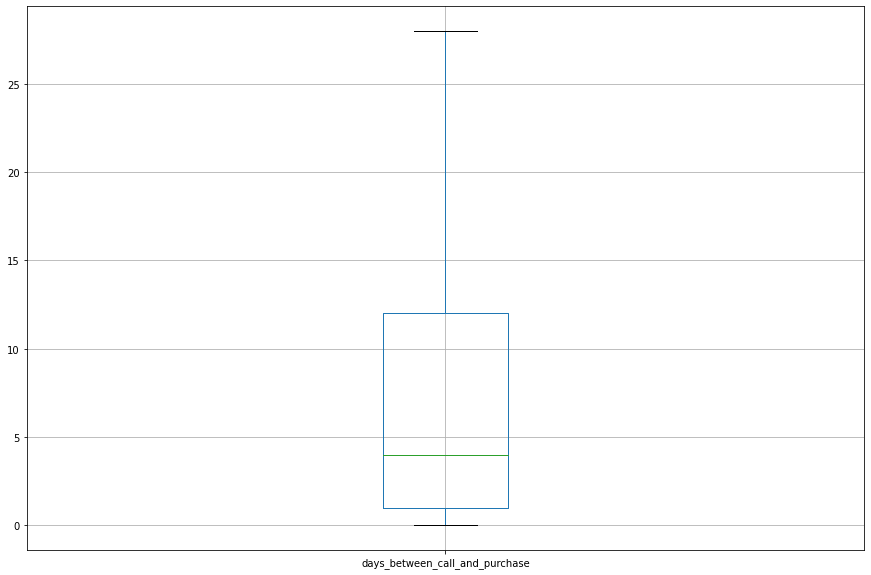

In [465]:
appointments_clean_df.boxplot(column=['days_between_call_and_purchase'], figsize=(15,10))

In [466]:
appointments_clean_df_copy['days_between_call_and_purchase'] = appointments_clean_df_copy['days_between_call_and_purchase'].fillna(value=appointments_clean_df_copy['days_between_call_and_purchase'].mean())
appointments_clean_df_copy.loc[appointments_clean_df_copy['purchase_made_after_call'] == "NO",'days_between_call_and_purchase'] = 0

In [467]:
appointments_clean_df.loc[appointments_clean_df['purchase_made_after_call']=="NO",'purchase_value_usd'].unique()

array([nan])

In [468]:
appointments_clean_df_copy['purchase_value_usd'] = appointments_clean_df_copy['purchase_value_usd'].fillna(value=0)

In [469]:
appointments_clean_df_copy['purchase_made_after_call'] = appointments_clean_df_copy['purchase_made_after_call'].replace(to_replace="YES",value=1)
appointments_clean_df_copy['purchase_made_after_call'] = appointments_clean_df_copy['purchase_made_after_call'].replace(to_replace="NO",value=0)

In [470]:
appointments_clean_df_copy

,Customer_Id,Date_Created_Local,Created_At_Local,Call_Started_Local,Scheduled_Start_Date_Local,Scheduled_Start_Time_Local,Scheduled_End_Time_Local,Status,Booked_By_Staff_Id,Staff_Joined_Count,Customer_Joined_Count,Customer_Enabled_Video,Call_Result,Call_Duration_(Sec),Staff_Score,Avg_Customer_Rating_(Overall),purchase_made_after_call,purchase_value_usd,days_between_call_and_purchase,Status_num
call_id,,,,,,,,,,,,,,,,,,,,
10653788,fk3nlsty-g7lu-ig6q-xli8-q1rjko1eh09c,2021-05-26,2021-05-26 15:52:00,2021-05-28 10:19:00,2021-05-28,2021-05-28 10:15:00,2021-05-28 10:25:00,ENDED,21998,2.5,1.0,0,Booking - Successful call,147.0,3.0,NaN,1,23.6,4.0,2
10343190,kk4w9y59-suss-ampm-4pox-oj2qhv0py3t4,2021-08-05,2021-08-05 23:04:00,2021-12-05 16:45:00,2021-12-05,2021-12-05 16:45:00,2021-12-05 16:55:00,ENDED,22017,1.0,1.0,1,Booking - Successful call,356.0,3.0,5.0,1,597.0,4.0,2
9647059,6vzngogp-dd3d-yllc-3zsc-gb3wui8cnsfo,2021-06-04,2021-06-04 16:53:00,2021-07-04 17:14:00,2021-07-04,2021-07-04 17:00:00,2021-07-04 17:10:00,ENDED,22017,1.0,2.0,1,Booking - Successful call,2427.0,4.0,5.0,1,27.5,25.0,2
9647059,6vzngogp-dd3d-yllc-3zsc-gb3wui8cnsfo,2021-06-04,2021-06-04 16:53:00,2021-07-04 17:14:00,2021-07-04,2021-07-04 17:00:00,2021-07-04 17:10:00,ENDED,22017,1.0,2.0,1,Booking - Successful call,2427.0,4.0,5.0,1,39.0,17.0,2
9709891,6l13g0kj-g0pa-hbw7-xshv-5ekgl2111yo6,2021-08-04,2021-08-04 18:10:00,2021-09-04 18:07:00,2021-09-04,2021-09-04 18:00:00,2021-09-04 18:15:00,ENDED,21998,1.0,1.0,1,Booking - Successful call,524.0,3.0,4.0,1,179.0,14.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11111696,11111696,2021-06-25,2021-06-25 17:06:00,NaT,2021-06-26,2021-06-26 17:30:00,2021-06-26 17:40:00,CANCELLED,21998,0.0,0.0,0,Booking - No one joined,0.0,0.0,NaN,0,0.0,0.0,0
11144660,11144660,2021-06-28,2021-06-28 11:19:00,NaT,2021-06-29,2021-06-29 16:30:00,2021-06-29 16:40:00,CANCELLED,22613,0.0,0.0,0,Booking - No one joined,0.0,0.0,NaN,0,0.0,0.0,0
11144933,11144933,2021-06-28,2021-06-28 11:30:00,NaT,2021-06-29,2021-06-29 11:30:00,2021-06-29 11:40:00,CANCELLED,21557,0.0,0.0,0,Booking - No one joined,0.0,0.0,NaN,0,0.0,0.0,0


In [471]:
appointments_clean_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 894 entries, 10653788 to 7925690
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Customer_Id                     894 non-null    object        
 1   Date_Created_Local              894 non-null    datetime64[ns]
 2   Created_At_Local                894 non-null    datetime64[ns]
 3   Call_Started_Local              443 non-null    datetime64[ns]
 4   Scheduled_Start_Date_Local      894 non-null    datetime64[ns]
 5   Scheduled_Start_Time_Local      894 non-null    datetime64[ns]
 6   Scheduled_End_Time_Local        894 non-null    datetime64[ns]
 7   Status                          894 non-null    object        
 8   Booked_By_Staff_Id              894 non-null    int64         
 9   Staff_Joined_Count              894 non-null    float64       
 10  Customer_Joined_Count           894 non-null    float64       


In [472]:
appointments_clean_df_copy['Avg_Customer_Rating_(Overall)'] = appointments_clean_df_copy['Avg_Customer_Rating_(Overall)'].fillna(value=appointments_clean_df_copy['Avg_Customer_Rating_(Overall)'].mean())

In [473]:
appointments_clean_df_copy['Call_Started_Local'] = appointments_clean_df_copy['Call_Started_Local'].fillna(appointments_clean_df_copy['Scheduled_Start_Time_Local'])

In [474]:
appointments_clean_df_copy['Days_until_appointment_from_scheduled'] = [int(i.days) for i in (appointments_clean_df_copy['Scheduled_Start_Date_Local'] - appointments_clean_df_copy['Date_Created_Local'])]

In [475]:
appointments_clean_df_copy['Seconds_between_actual_estimate_call_time'] = (appointments_clean_df_copy['Call_Started_Local'] - appointments_clean_df_copy['Scheduled_Start_Time_Local'])/ np.timedelta64(1, 's')

In [476]:
appointments_clean_df_copy['Call_Result'].value_counts()

Booking - Successful call                                             436
Booking - No one joined                                               205
Booking - Clerk joined consumer did not join                          191
Booking - Consumer joined clerk did not joined                         49
Booking - Consumer and clerk join but not present at the same time     13
Name: Call_Result, dtype: int64

In [477]:
appointments_clean_df_copy['Status'].value_counts()

ENDED        640
CANCELLED    180
CREATED       74
Name: Status, dtype: int64

In [478]:
appointments_clean_df_copy['Call_Result'] = appointments_clean_df_copy['Call_Result'].replace({"Booking - Successful call":5,"Booking - Consumer and clerk join but not present at the same time":4,"Booking - Clerk joined consumer did not join":3,"Booking - Consumer joined clerk did not joined":2,"Booking - No one joined":1})

In [479]:
appointments_clean_df_copy['Status'] = appointments_clean_df_copy['Status'].replace({"CANCELLED":0,"CREATED":1,"ENDED":2})

In [480]:
appointments_clean_df_copy.loc[appointments_clean_df_copy['Call_Result'] != 5,'days_between_call_and_purchase'] = 0

In [481]:
appointments_clean_df_copy['Scheduled_duration_(sec)'] = (appointments_clean_df_copy['Scheduled_End_Time_Local'] - appointments_clean_df_copy['Scheduled_Start_Time_Local'])/ np.timedelta64(1, 's')

In [482]:
appointments_clean_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 894 entries, 10653788 to 7925690
Data columns (total 23 columns):
 #   Column                                     Non-Null Count  Dtype         
---  ------                                     --------------  -----         
 0   Customer_Id                                894 non-null    object        
 1   Date_Created_Local                         894 non-null    datetime64[ns]
 2   Created_At_Local                           894 non-null    datetime64[ns]
 3   Call_Started_Local                         894 non-null    datetime64[ns]
 4   Scheduled_Start_Date_Local                 894 non-null    datetime64[ns]
 5   Scheduled_Start_Time_Local                 894 non-null    datetime64[ns]
 6   Scheduled_End_Time_Local                   894 non-null    datetime64[ns]
 7   Status                                     894 non-null    int64         
 8   Booked_By_Staff_Id                         894 non-null    int64         
 9   Staff_Join

In [483]:
appointments_clean_df_copy = appointments_clean_df_copy.drop(["purchase_value_usd","days_between_call_and_purchase","Booked_By_Staff_Id","Status","Scheduled_End_Time_Local","Scheduled_Start_Time_Local","Call_Started_Local","Scheduled_Start_Date_Local","Created_At_Local","Customer_Id","Date_Created_Local","Status"],axis=1)

In [484]:
appointments_clean_df_copy

,Staff_Joined_Count,Customer_Joined_Count,Customer_Enabled_Video,Call_Result,Call_Duration_(Sec),Staff_Score,Avg_Customer_Rating_(Overall),purchase_made_after_call,Status_num,Days_until_appointment_from_scheduled,Seconds_between_actual_estimate_call_time,Scheduled_duration_(sec)
call_id,,,,,,,,,,,,
10653788,2.5,1.0,0,5,147.0,3.0,4.022879,1,2,2,240.0,600.0
10343190,1.0,1.0,1,5,356.0,3.0,5.000000,1,2,122,0.0,600.0
9647059,1.0,2.0,1,5,2427.0,4.0,5.000000,1,2,30,840.0,600.0
9647059,1.0,2.0,1,5,2427.0,4.0,5.000000,1,2,30,840.0,600.0
9709891,1.0,1.0,1,5,524.0,3.0,4.000000,1,2,31,420.0,900.0
...,...,...,...,...,...,...,...,...,...,...,...,...
11111696,0.0,0.0,0,1,0.0,0.0,4.022879,0,0,1,0.0,600.0
11144660,0.0,0.0,0,1,0.0,0.0,4.022879,0,0,1,0.0,600.0
11144933,0.0,0.0,0,1,0.0,0.0,4.022879,0,0,1,0.0,600.0


### Normalise Data

Since data values for various features vary considerably, the data has been scaled.

In [485]:
appointments_clean_df_copy_scaled = appointments_clean_df_copy.drop(columns=['purchase_made_after_call'])

In [486]:
appointments_clean_df_copy_scaled

,Staff_Joined_Count,Customer_Joined_Count,Customer_Enabled_Video,Call_Result,Call_Duration_(Sec),Staff_Score,Avg_Customer_Rating_(Overall),Status_num,Days_until_appointment_from_scheduled,Seconds_between_actual_estimate_call_time,Scheduled_duration_(sec)
call_id,,,,,,,,,,,
10653788,2.5,1.0,0,5,147.0,3.0,4.022879,2,2,240.0,600.0
10343190,1.0,1.0,1,5,356.0,3.0,5.000000,2,122,0.0,600.0
9647059,1.0,2.0,1,5,2427.0,4.0,5.000000,2,30,840.0,600.0
9647059,1.0,2.0,1,5,2427.0,4.0,5.000000,2,30,840.0,600.0
9709891,1.0,1.0,1,5,524.0,3.0,4.000000,2,31,420.0,900.0
...,...,...,...,...,...,...,...,...,...,...,...
11111696,0.0,0.0,0,1,0.0,0.0,4.022879,0,1,0.0,600.0
11144660,0.0,0.0,0,1,0.0,0.0,4.022879,0,1,0.0,600.0
11144933,0.0,0.0,0,1,0.0,0.0,4.022879,0,1,0.0,600.0


In [487]:
scaler = MinMaxScaler() 
appointments_clean_df_copy_scaled = scaler.fit_transform(appointments_clean_df_copy_scaled)

In [488]:
appointments_clean_df_copy_scaled.mean(axis=0)

array([0.36286353, 0.298434  , 0.49105145, 0.61912752, 0.10265152,
       0.41638702, 0.7557197 , 0.75727069, 0.64203292, 0.19944411,
       0.07755406])

In [489]:
appointments_clean_df_copy_scaled.std(axis=0)

array([0.28150894, 0.31738904, 0.49991992, 0.41157459, 0.15286029,
       0.37569835, 0.19920269, 0.40387904, 0.16078635, 0.0732732 ,
       0.18305221])

In [490]:
appointments_clean_df_copy_scaled.min(axis=0)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [491]:
appointments_clean_df_copy_scaled.max(axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [492]:
 appointments_clean_df_copy_scaled = pd.DataFrame(data=appointments_clean_df_copy_scaled, index=appointments_clean_df_copy.index, 
                                                  columns=['Staff_Joined_Count', 'Customer_Joined_Count', 'Customer_Enabled_Video',
       'Call_Result', 'Call_Duration_(Sec)', 'Staff_Score',
       'Avg_Customer_Rating_(Overall)', 'Status_num',
       'Days_until_appointment_from_scheduled',
       'Seconds_between_actual_estimate_call_time',
       'Scheduled_duration_(sec)'])

In [493]:
appointments_clean_df_copy_scaled['purchase_made_after_call'] = appointments_clean_df_copy['purchase_made_after_call']

In [494]:
appointments_clean_df_copy_scaled

,Staff_Joined_Count,Customer_Joined_Count,Customer_Enabled_Video,Call_Result,Call_Duration_(Sec),Staff_Score,Avg_Customer_Rating_(Overall),Status_num,Days_until_appointment_from_scheduled,Seconds_between_actual_estimate_call_time,Scheduled_duration_(sec),purchase_made_after_call
call_id,,,,,,,,,,,,
10653788,1.0,0.4,0.0,1.0,0.042412,0.75,0.75572,1.0,0.659142,0.242424,0.000000,1
10343190,0.4,0.4,1.0,1.0,0.102712,0.75,1.00000,1.0,0.930023,0.181818,0.000000,1
9647059,0.4,0.8,1.0,1.0,0.700231,1.00,1.00000,1.0,0.722348,0.393939,0.000000,1
9647059,0.4,0.8,1.0,1.0,0.700231,1.00,1.00000,1.0,0.722348,0.393939,0.000000,1
9709891,0.4,0.4,1.0,1.0,0.151183,0.75,0.75000,1.0,0.724605,0.287879,0.166667,1
...,...,...,...,...,...,...,...,...,...,...,...,...
11111696,0.0,0.0,0.0,0.0,0.000000,0.00,0.75572,0.0,0.656885,0.181818,0.000000,0
11144660,0.0,0.0,0.0,0.0,0.000000,0.00,0.75572,0.0,0.656885,0.181818,0.000000,0
11144933,0.0,0.0,0.0,0.0,0.000000,0.00,0.75572,0.0,0.656885,0.181818,0.000000,0


## Modelling

### Multi-Layer Perceptron Classifier (MLPC)

A multi-layer perceptron classifier (MLPC) was choosen to attempt to predict whether a customer would make a purchase based on other appointment related information.
Purchase made after call was selected as the dependent variable. I removed any columns that would be problematic as independent variables, such as purchase value.
Data had previously been scaled and categorical and null values dealt with. 
Timestamp data was removed and in some cases replaced with another type of data, such as length of a time in seconds.
Data was split into train and test 4:1.

In [495]:
appointments_clean_df_copy_scaled.columns

Index(['Staff_Joined_Count', 'Customer_Joined_Count', 'Customer_Enabled_Video',
       'Call_Result', 'Call_Duration_(Sec)', 'Staff_Score',
       'Avg_Customer_Rating_(Overall)', 'Status_num',
       'Days_until_appointment_from_scheduled',
       'Seconds_between_actual_estimate_call_time', 'Scheduled_duration_(sec)',
       'purchase_made_after_call'],
      dtype='object')

In [496]:
x = appointments_clean_df_copy_scaled[['Staff_Joined_Count', 'Customer_Joined_Count', 'Customer_Enabled_Video',
       'Call_Result', 'Call_Duration_(Sec)', 'Staff_Score',
       'Avg_Customer_Rating_(Overall)', 'Status_num',
       'Days_until_appointment_from_scheduled',
       'Seconds_between_actual_estimate_call_time',
       'Scheduled_duration_(sec)']]

y = appointments_clean_df_copy_scaled['purchase_made_after_call']

x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.2,random_state=2)

neu_clf = MLPClassifier(random_state=2, hidden_layer_sizes=(11,11),max_iter=1000).fit(x_train, y_train)

pred = neu_clf.predict(x_test)


In [497]:
print(confusion_matrix(y_test,pred))

[[157   2]
 [ 20   0]]


In [498]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.89      0.99      0.93       159
           1       0.00      0.00      0.00        20

    accuracy                           0.88       179
   macro avg       0.44      0.49      0.47       179
weighted avg       0.79      0.88      0.83       179



In [499]:
len(neu_clf.coefs_)

3

In [500]:
len(neu_clf.coefs_[0])

11

In [501]:
len(neu_clf.intercepts_[0])

11

In [502]:
neu_clf.coefs_

[array([[-1.05371015e-01, -6.71014042e-04,  3.39551696e-31,
         -2.96144537e-02,  1.92650432e-01, -7.44859633e-01,
         -6.35440666e-02,  2.65790599e-01, -1.27300931e-01,
         -1.80347146e-01,  3.66697803e-17],
        [-5.50255316e-02, -3.19768874e-05,  1.18330426e-36,
         -2.39397567e-01,  1.93921773e-01,  6.44177610e-01,
         -7.82974467e-02,  4.92404669e-01, -9.38795361e-01,
         -4.60935566e-01, -2.68205956e-04],
        [-1.51587821e-01, -1.13057510e-04, -4.17822216e-05,
         -3.08097472e-03, -1.16180016e-01,  2.35525606e-01,
          8.09311524e-02, -3.33726206e-02, -3.12822910e-02,
         -4.93788337e-01,  1.20670859e-14],
        [-8.43459744e-02,  1.18837285e-37, -1.39623020e-18,
          5.11577690e-01, -2.21447010e-01, -7.89693521e-01,
         -4.65050989e-01,  5.29732218e-01, -3.70019973e-01,
          6.21618206e-02, -6.55625277e-13],
        [ 2.27734363e-02, -4.57144522e-27,  3.21207904e-29,
          1.87423776e-01, -2.90427701e-01,  

### MLPC with SMOTE for Balanced Data

In [503]:
sm = SMOTE(random_state=2)
x_train_new, y_train_new = sm.fit_resample(x, y)

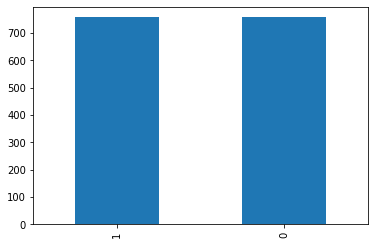

In [504]:
pd.Series(y_train_new).value_counts().plot.bar()

In [505]:
x.shape

(894, 11)

In [506]:
x_train_new.shape

(1514, 11)

In [507]:
x_train_new, x_test_new, y_train_new, y_test_new = train_test_split(x_train_new, y_train_new,test_size=0.2,random_state=2)

In [508]:
neu_clf2 = MLPClassifier(random_state=2, hidden_layer_sizes=(11,11),max_iter=1000).fit(x_train_new, y_train_new)

In [509]:
pred2 = neu_clf2.predict(x_test_new)

In [510]:
print(confusion_matrix(y_test_new,pred2))

[[ 94  56]
 [ 11 142]]


In [511]:
print(classification_report(y_test_new, pred2))

              precision    recall  f1-score   support

           0       0.90      0.63      0.74       150
           1       0.72      0.93      0.81       153

    accuracy                           0.78       303
   macro avg       0.81      0.78      0.77       303
weighted avg       0.81      0.78      0.77       303



In [512]:
neu_clf2.coefs_

[array([[-1.67944623e-01, -4.28934222e-03,  7.01818939e-47,
         -7.71745499e-02, -1.30239468e-01, -3.90037941e-01,
         -1.93565518e-02, -4.98872299e-02, -8.66355075e-02,
         -2.22236533e-01,  4.32959384e-21],
        [ 4.99761662e-01, -2.99028461e-04,  3.33107193e-53,
          7.74211007e-04,  4.83486780e-01,  5.63946305e-01,
         -1.64089180e-01,  6.09992999e-01, -1.10500186e+00,
          3.52472040e-02, -1.96980156e-03],
        [ 2.05428306e-01, -9.28647179e-04, -3.81437012e-04,
         -1.91815360e-02, -2.24570176e-01, -1.47609658e-01,
          1.13446184e-02, -1.26287366e-01, -2.41802693e-01,
          1.43603051e-01,  3.78471897e-16],
        [-3.62501690e-01, -1.05644856e-53,  3.59451839e-24,
          2.42196334e-01,  4.73960023e-01, -5.01762997e-01,
         -2.24866867e-01,  9.64218619e-01, -3.95803375e-01,
          3.34215695e-01, -2.31206803e-13],
        [-3.58920213e-01, -2.38749774e-39,  3.49710692e-43,
         -1.88603169e-01,  6.91312563e-01,  

## Interpret Results

<ul> - 138 sales </ul> 

<ul> - Mean value of purchase $803</ul> 

<ul> - 15% of appointments resulted in purchases. This appears to be a good result when compared to ecommerce conversion rates which are often around 1-2%.</ul> 

<ul> - From the exploratory analysis, an inverse correlation was seen between the number of customer join attempts and ratings. Where customers attempted to join a call more than four times, no purchase was made. This is not surprising, as higher join attempts would certainly result in customer increased levels of frustration and overall customer dissatisfaction. </ul>  

<ul> - A Mann-Whitney U rank test was used to test the null hypothesis that there is no significant difference between the mean customer join counts with a purchase and those without a purchase. This was rejected.</ul>

<ul> - Inverse correlation between rating questions and purchase. The questions explored 1) stream quality 2) staff helpfulness and 3) likely to reuse the service. A bimodal distribution was seen for all rating question answers, with the larger peak falling at the higher end of the rating spectrum (4-5). A smaller peak fell at the lower ratings(1-2), with very few ratings in the middle. Overall the ratings were positive which may explain the high conversion rate mentioned above.</ul>

<ul> - Ratings of staff helpfulness was analysed on an individual basis. Staff ID 22858 had only 14 appointments compared with 211 appointments by 21998, yet had the highest ratings. When explored further, this individual had low staff join counts as well as low customer join counts. They also had a higher proportion of calls under the sales demo category. Ratings were generally higher for sales demo and product information type appointments compared with customer service or those that resulted in no interaction.</ul>

<ul> - A better user experience is correlated with an increase in purchases. Improved and more stable streaming as well as improved interactions with staff are good options to explore going forward.</ul>

## Model Predictions

The MLPC classified 152 true negatives and 6 true positives while only 7 false positives and 14 false negatives. The f1-score of the respective no purchase and purchase categories are 0.94 and 0.36 with a weighted average of 0.87.

The data was quite imbalanced, so SMOTE was used to generate date for the minority class.
When run for the second time, the MLPC holistically performed better with comparable f1 scores 0.77 and 0.84 and a weighted average of 0.8.


## Future Work

<ul> - Explore timestamp data further. Are local timezones local to the customer or staff or both depending on field name? It would be nice to have the specific local timezones, this could, for example, tell us about regional differences or simply allow us to compare to the UTC timestamp data available. Seasonal changes should also be analysed.</ul>

<ul> - Missing data. More complete data would be very useful, such as Customer ID, so we can fully assess whether customers are making best use of the booking system, for example, by rebooking a cancelled appointment.</ul>

<ul> - Further statistical significance testing.</ul>

<ul> - Explore further whether MLPC model can be improved upon and try other types of models to assess the product's success. Removed some features in the data that were correlated but it may be possible to improve on this. </ul>

<ul> - All data in this analysis was from Booking. It would be interesting to compare this with other products from Go Instore.</ul>

<ul> - In 2.2.1 it was highlighted that 15% of appointments resulted in purchases, which when compared with ecommerce rates, would be interpreted as high. What are the target conversion rates? In addition to ecommerce what other sectors would make appropriate comparisons? Going forward, I would investigate the market, looking for similar companies to see whether this is as succesful as it appears.</ul>